<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import os

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50

import numpy as np
import matplotlib.pyplot as plt

2024-12-14 00:29:32.736397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734107372.821383   14387 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734107372.846099   14387 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 00:29:33.051675: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


keras:  3.7.0


## Step 1: Data Loading

In [2]:
import os
#base_dir is the directory where you stored the images
base_dir = '/home/yoyo/projects/tf217'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

## Step 2 and 3:  Develop and Test the Image Classification Models

### Model #1.1 (Baseline for Non-Pretrain Full Training)

In [71]:
# Define the model
# This is a simple baseline for the non-pretrained model 

img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [72]:
# View all the layers of the model
model.summary() 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255) # Rescale train pixel values 

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [6]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100


/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733947678.580413  396631 service.cc:148] XLA service 0x7f4c30005020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733947678.580690  396631 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-12 04:07:58.621303: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733947678.718324  396631 cuda_dnn.cc:529] Loaded cuDNN version 90300


  4/235 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - acc: 0.1276 - loss: 2.3484

I0000 00:00:1733947683.697101  396631 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - acc: 0.2125 - loss: 2.1259 - val_acc: 0.3575 - val_loss: 1.7971
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - acc: 0.4019 - loss: 1.7014 - val_acc: 0.4385 - val_loss: 1.5937
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - acc: 0.4816 - loss: 1.5034 - val_acc: 0.4615 - val_loss: 1.5179
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.5300 - loss: 1.3650 - val_acc: 0.4545 - val_loss: 1.5118
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - acc: 0.5747 - loss: 1.2421 - val_acc: 0.5015 - val_loss: 1.4324
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - acc: 0.6231 - loss: 1.1363 - val_acc: 0.4795 - val_loss: 1.4815
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.6447 - loss: 1.0396 - val_acc: 0.4960 - val_loss: 1.4384
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - acc: 0.7065 - loss: 0.8929 - val_acc: 0.5005 - val_loss: 1.5113
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s

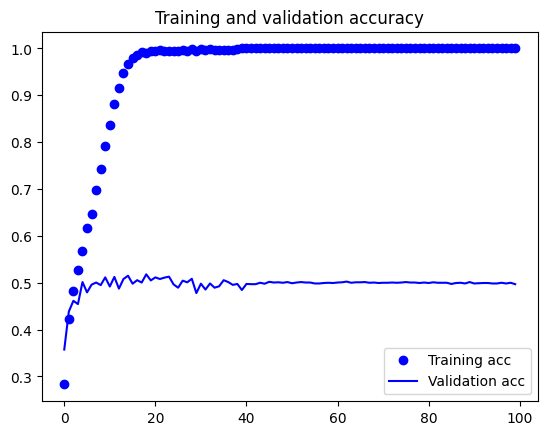

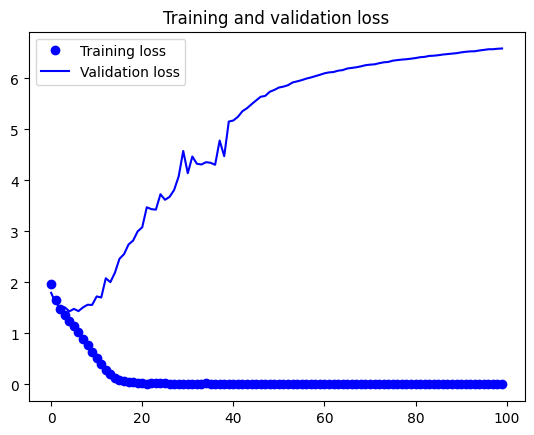

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# Save the Model
model.save('food_model_1.h5')

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.5306 - loss: 6.3680
test acc: 0.5199999809265137


### Model #1.2 (Baseline for Non-Pretrain Optimized)

In [74]:
# Fit the model on training data for 16 epochs
history = model.fit(
      train_generator,
      epochs=16,
      validation_data=validation_generator)

Epoch 1/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - acc: 0.2057 - loss: 2.1572 - val_acc: 0.3535 - val_loss: 1.7996
Epoch 2/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - acc: 0.4035 - loss: 1.7037 - val_acc: 0.4245 - val_loss: 1.6174
Epoch 3/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - acc: 0.4643 - loss: 1.5341 - val_acc: 0.4560 - val_loss: 1.5423
Epoch 4/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - acc: 0.5223 - loss: 1.3989 - val_acc: 0.4990 - val_loss: 1.4466
Epoch 5/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - acc: 0.5618 - loss: 1.2951 - val_acc: 0.5005 - val_loss: 1.4259
Epoch 6/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - acc: 0.6046 - loss: 1.1725 - val_acc: 0.5025 - val_loss: 1.4127
Epoch 7/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.6329 - loss: 1.0680 - val_acc: 0.5055 - val_loss: 1.4165
Epoch 8/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - acc: 0.6840 - loss: 0.9446 - val_acc: 0.5135 - val_loss: 1.4556
Epoch 9/16
235/235 ━━━━━━━━━━━━━━━━━━━━ 

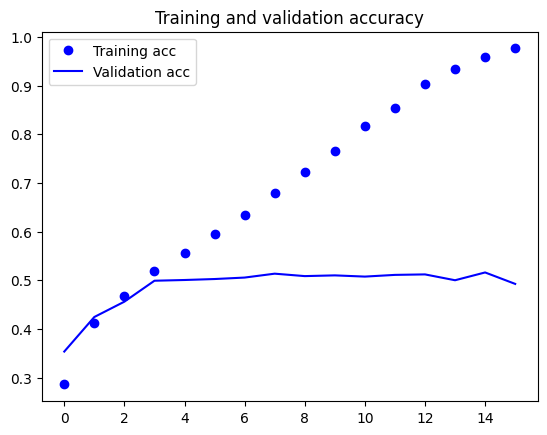

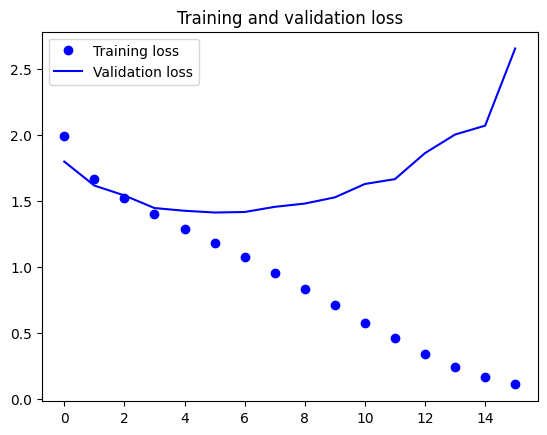

In [75]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [76]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.4367 - loss: 2.9484
test acc: 0.47999998927116394


### Model #2.1 (Non-Pretrain Full Training)

In [81]:
img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [82]:
# View all the layers of the model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Added data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [16]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - acc: 0.1721 - loss: 2.2151

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - acc: 0.1724 - loss: 2.2146 - val_acc: 0.3415 - val_loss: 1.8545
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - acc: 0.3418 - loss: 1.8699 - val_acc: 0.4290 - val_loss: 1.6272
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - acc: 0.3976 - loss: 1.7190 - val_acc: 0.4630 - val_loss: 1.5404
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - acc: 0.4208 - loss: 1.6511 - val_acc: 0.4410 - val_loss: 1.6326
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - acc: 0.4486 - loss: 1.5793 - val_acc: 0.4830 - val_loss: 1.4795
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - acc: 0.4652 - loss: 1.5457 - val_acc: 0.5190 - val_loss: 1.3885
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - acc: 0.4731 - loss: 1.4830 - val_acc: 0.5165 - val_loss: 1.3693
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - acc: 0.4893 - loss: 1.4667 - val_acc: 0.5095 - val_loss: 1.4097
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━

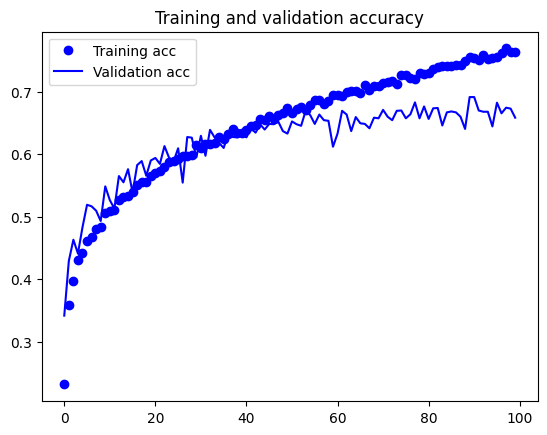

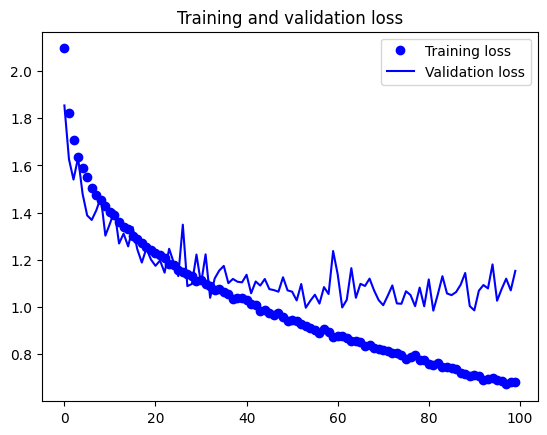

In [17]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Save the Model
model.save('food_model_2.h5')

In [19]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6767 - loss: 1.1235
test acc: 0.6499999761581421


### Model #2.2 (Non-Pretrain Optimized)

In [84]:
# Fit the model on training data for 30 epochs
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - acc: 0.1736 - loss: 2.2298 - val_acc: 0.2175 - val_loss: 2.2176
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - acc: 0.2937 - loss: 1.9362 - val_acc: 0.3780 - val_loss: 1.7568
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - acc: 0.3630 - loss: 1.8039 - val_acc: 0.4360 - val_loss: 1.5952
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - acc: 0.3928 - loss: 1.7256 - val_acc: 0.4500 - val_loss: 1.5661
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.4210 - loss: 1.6596 - val_acc: 0.4750 - val_loss: 1.4857
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - acc: 0.4508 - loss: 1.6019 - val_acc: 0.4995 - val_loss: 1.4446
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - acc: 0.4624 - loss: 1.5499 - val_acc: 0.5135 - val_loss: 1.4180
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - acc: 0.4727 - loss: 1.5078 - val_acc: 0.4960 - val_loss: 1.4929
Epoch 9/30
235/235 ━━━━━━━━━━━━━

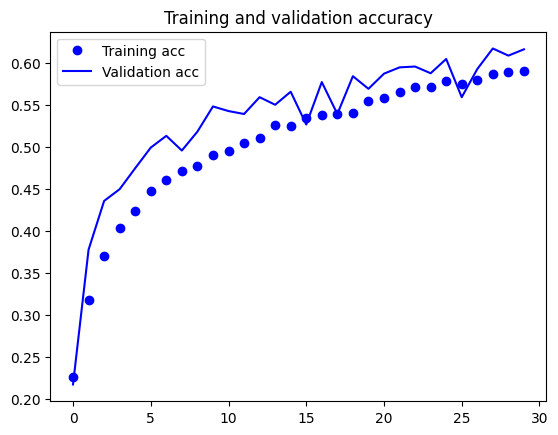

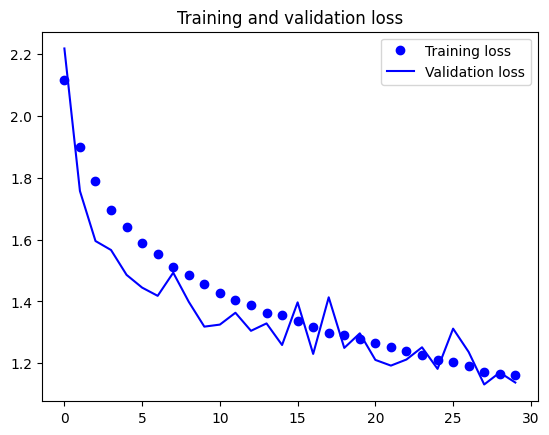

In [85]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.5390 - loss: 1.2401
test acc: 0.5860000252723694


### Model #3.1 (Non-Pretrain Full Training)

In [3]:
img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

I0000 00:00:1733984700.543529  562864 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [4]:
# View all the layers of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [25]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - acc: 0.1400 - loss: 2.3621 - val_acc: 0.2885 - val_loss: 2.1785
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2487 - loss: 2.0439 - val_acc: 0.2835 - val_loss: 2.0506
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - acc: 0.2963 - loss: 1.9415 - val_acc: 0.3235 - val_loss: 1.9883
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - acc: 0.3189 - loss: 1.8959 - val_acc: 0.3420 - val_loss: 1.9325
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - acc: 0.3443 - loss: 1.8422 - val_acc: 0.3965 - val_loss: 1.8466
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.3787 - loss: 1.7569 - val_acc: 0.4040 - val_loss: 1.7673
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.4113 - loss: 1.7004 - val_acc: 0.4255 - val_loss: 1.7231
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - acc: 0.4071 - loss: 1.6838 - val_acc: 0.3935 - val_loss: 1.7309
Epoch 9/100
235/235 ━━━━

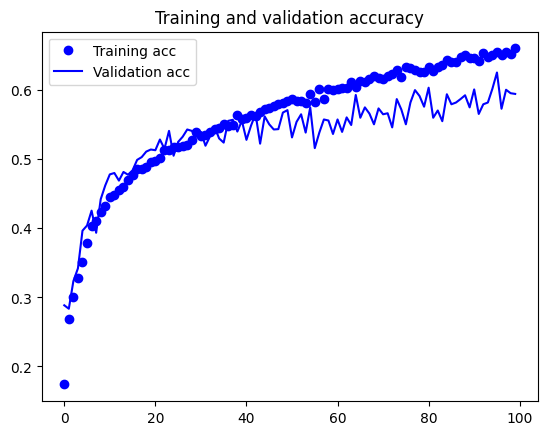

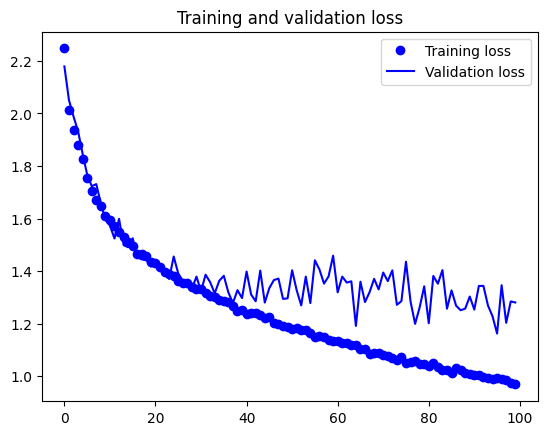

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
# Save the Model
model.save('food_model_3.h5')

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.5877 - loss: 1.3266
test acc: 0.578000009059906


### Model #3.2 (Non-Pretrain Optimized)

In [6]:
# Fit the model on training data for 60 epochs
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator)

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60


I0000 00:00:1733984708.124259  563032 service.cc:148] XLA service 0x7fc69800b330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733984708.124482  563032 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-12 14:25:08.163643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733984708.276148  563032 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/235 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - acc: 0.0851 - loss: 4.8699

I0000 00:00:1733984712.551111  563032 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - acc: 0.1325 - loss: 2.6800

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 162ms/step - acc: 0.1327 - loss: 2.6786 - val_acc: 0.2430 - val_loss: 2.1995
Epoch 2/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - acc: 0.2483 - loss: 2.0755 - val_acc: 0.2630 - val_loss: 2.0976
Epoch 3/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.2907 - loss: 1.9702 - val_acc: 0.3130 - val_loss: 2.0139
Epoch 4/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.2979 - loss: 1.9327 - val_acc: 0.3395 - val_loss: 1.9503
Epoch 5/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - acc: 0.3270 - loss: 1.8767 - val_acc: 0.3340 - val_loss: 1.9163
Epoch 6/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.3503 - loss: 1.8288 - val_acc: 0.3210 - val_loss: 1.8661
Epoch 7/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - acc: 0.3762 - loss: 1.7810 - val_acc: 0.2815 - val_loss: 1.8635
Epoch 8/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.3953 - loss: 1.7201 - val_acc: 0.3130 - val_loss: 1.8451
Epoch 9/60
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s

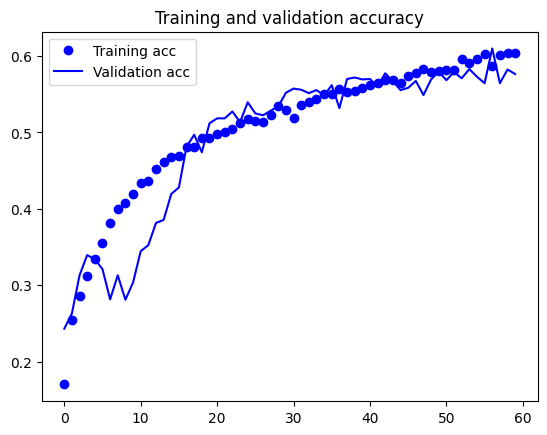

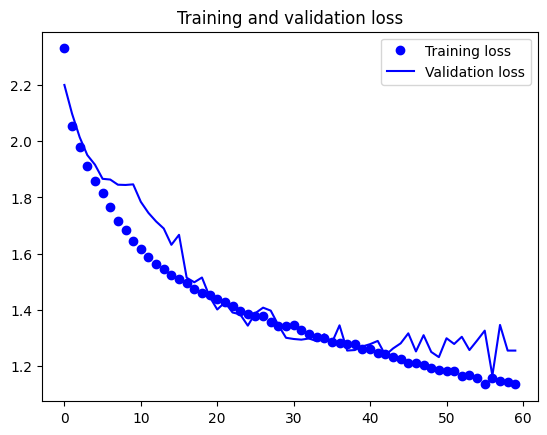

In [7]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.5602 - loss: 1.3520
test acc: 0.578000009059906


### Model #4.1 (Non-Pretrain Full Training)

In [10]:
img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [11]:
# View all the layers of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16, # Changed batch size 32 --> 16 for better generalization
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16, # Changed batch size 32 --> 16 for better generalization
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [34]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 63ms/step - acc: 0.1274 - loss: 2.4799 - val_acc: 0.2305 - val_loss: 2.2259
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - acc: 0.2380 - loss: 2.0614 - val_acc: 0.3135 - val_loss: 2.0186
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - acc: 0.3188 - loss: 1.8914 - val_acc: 0.3285 - val_loss: 1.9197
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - acc: 0.3518 - loss: 1.8118 - val_acc: 0.3205 - val_loss: 1.8647
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - acc: 0.3807 - loss: 1.7349 - val_acc: 0.4165 - val_loss: 1.7089
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.4123 - loss: 1.6803 - val_acc: 0.4140 - val_loss: 1.6875
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.4248 - loss: 1.6501 - val_acc: 0.4205 - val_loss: 1.6500
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.4369 - loss: 1.5950 - val_acc: 0.4730 - val_loss: 1.5607
Epoch 9/100
469/469 ━━━━━━━━━━━━

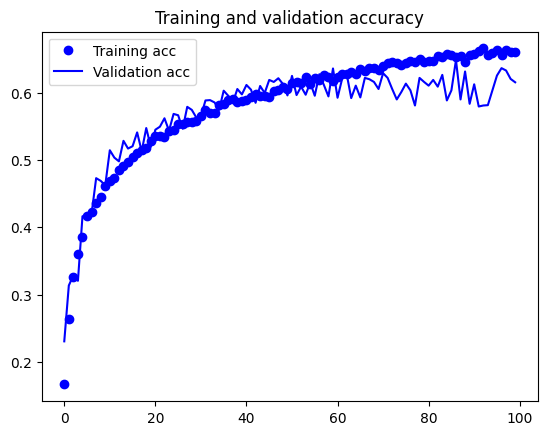

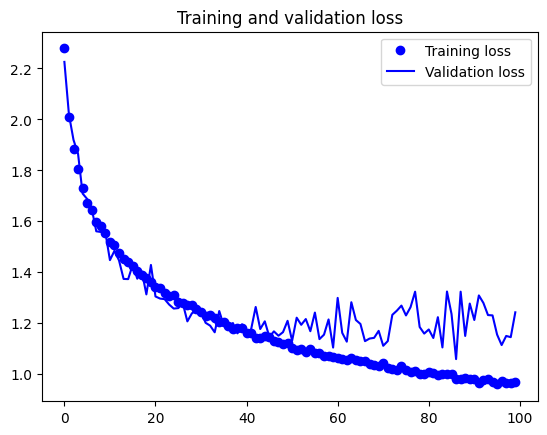

In [35]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
# Save the Model
model.save('food_model_4.h5')

In [37]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.5985 - loss: 1.3066
test acc: 0.6100000143051147


### Model #4.2 (Non-Pretrain Optimized)

In [13]:
# Fit the model on training data for 70 epochs
history = model.fit(
      train_generator,
      epochs=70,
      validation_data=validation_generator)

Epoch 1/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - acc: 0.1345 - loss: 2.4860 - val_acc: 0.2825 - val_loss: 2.1815
Epoch 2/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.2700 - loss: 2.0292 - val_acc: 0.2885 - val_loss: 2.0225
Epoch 3/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.3128 - loss: 1.8980 - val_acc: 0.3170 - val_loss: 1.9400
Epoch 4/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - acc: 0.3545 - loss: 1.8306 - val_acc: 0.3280 - val_loss: 1.8711
Epoch 5/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - acc: 0.3776 - loss: 1.7666 - val_acc: 0.3525 - val_loss: 1.8032
Epoch 6/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - acc: 0.3986 - loss: 1.7071 - val_acc: 0.3495 - val_loss: 1.7870
Epoch 7/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - acc: 0.4251 - loss: 1.6474 - val_acc: 0.4265 - val_loss: 1.6698
Epoch 8/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.4457 - loss: 1.6044 - val_acc: 0.3875 - val_loss: 1.7505
Epoch 9/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 

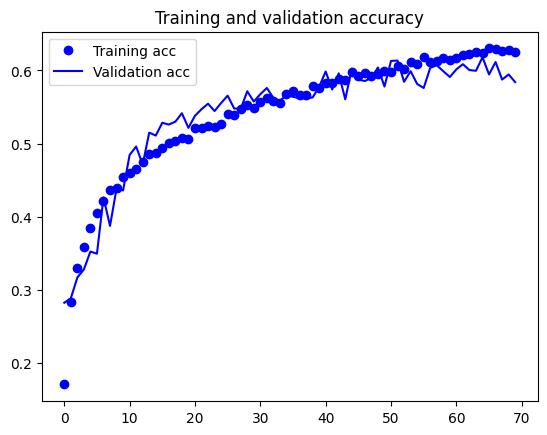

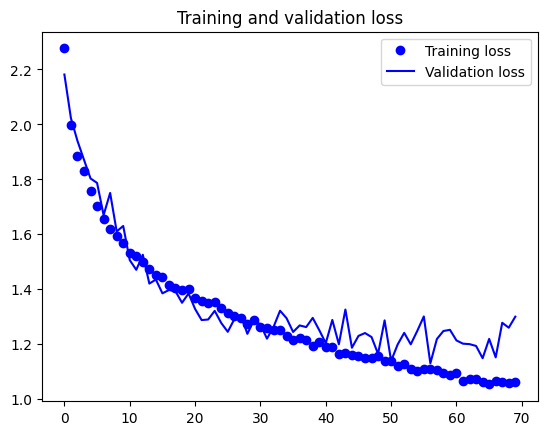

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5721 - loss: 1.2203
test acc: 0.5720000267028809


### Model #5.1 (Non-Pretrain Full Training)

In [16]:
img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [17]:
# View all the layers of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), # Changed optimizer RMSprop --> Adam
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [43]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - acc: 0.1287 - loss: 2.3400 - val_acc: 0.2790 - val_loss: 2.1206
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - acc: 0.2655 - loss: 1.9953 - val_acc: 0.3375 - val_loss: 1.9546
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.3356 - loss: 1.8756 - val_acc: 0.3660 - val_loss: 1.8570
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.3634 - loss: 1.7935 - val_acc: 0.3660 - val_loss: 1.8053
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.3859 - loss: 1.7518 - val_acc: 0.3990 - val_loss: 1.7059
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.4171 - loss: 1.6737 - val_acc: 0.3435 - val_loss: 1.7150
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - acc: 0.4416 - loss: 1.6097 - val_acc: 0.4100 - val_loss: 1.6396
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.4448 - loss: 1.5755 - val_acc: 0.4670 - val_loss: 1.5526
Epoch 9/100
469/469 ━━━━━━━━━━━━

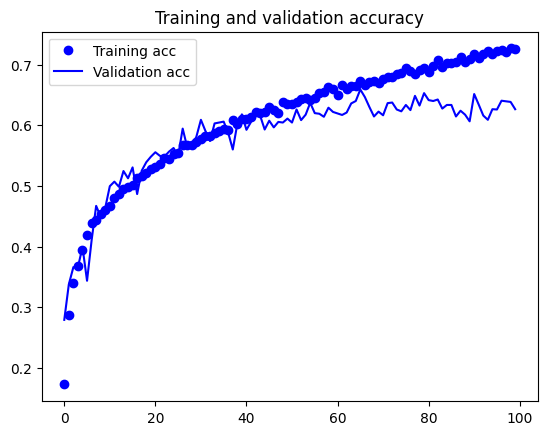

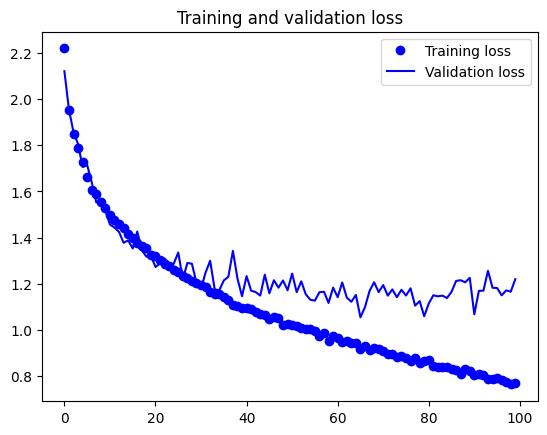

In [44]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
# Save the Model
model.save('food_model_5.h5')

In [46]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.5936 - loss: 1.2615
test acc: 0.6200000047683716


### Model #5.2 (Non-Pretrain Optimized)

In [19]:
# Fit the model on training data for 60 epochs
history = model.fit(
      train_generator,
      epochs=60,
      validation_data=validation_generator)

Epoch 1/60
116/469 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - acc: 0.1236 - loss: 2.3877

469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - acc: 0.1577 - loss: 2.2846 - val_acc: 0.2915 - val_loss: 2.0755
Epoch 2/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - acc: 0.3073 - loss: 1.9396 - val_acc: 0.3455 - val_loss: 1.8964
Epoch 3/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - acc: 0.3504 - loss: 1.8165 - val_acc: 0.3610 - val_loss: 1.8236
Epoch 4/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.3790 - loss: 1.7423 - val_acc: 0.4235 - val_loss: 1.6844
Epoch 5/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - acc: 0.4152 - loss: 1.6564 - val_acc: 0.4145 - val_loss: 1.6811
Epoch 6/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - acc: 0.4155 - loss: 1.6427 - val_acc: 0.4475 - val_loss: 1.5813
Epoch 7/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.4488 - loss: 1.5540 - val_acc: 0.4745 - val_loss: 1.5250
Epoch 8/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - acc: 0.4580 - loss: 1.5309 - val_acc: 0.4895 - val_loss: 1.4871
Epoch 9/60
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/st

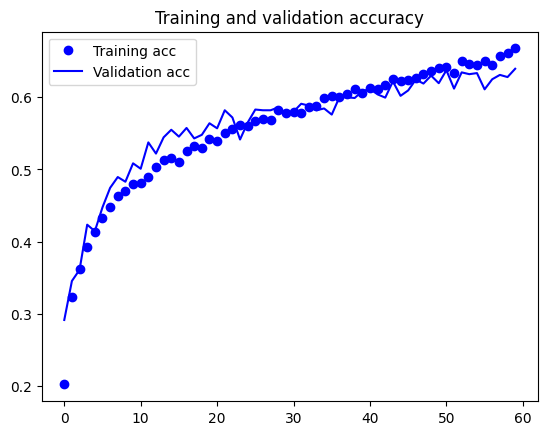

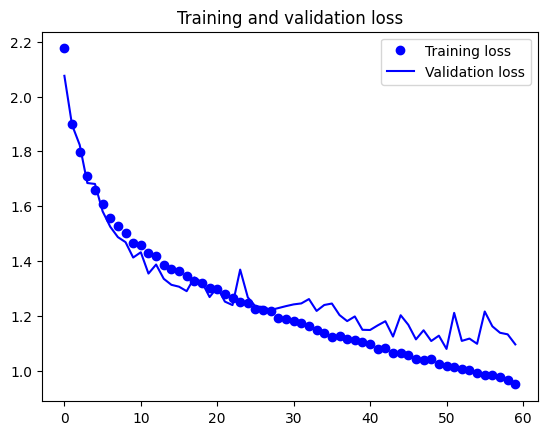

In [20]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6419 - loss: 1.1012
test acc: 0.6140000224113464


### Model #6.1 (Non-Pretrain Full Training)

In [22]:
img_size = 150

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [23]:
# View all the layers of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), # Changed learining rate 1e-4 --> 1e-5
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [52]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 62ms/step - acc: 0.1200 - loss: 2.3412 - val_acc: 0.1375 - val_loss: 2.2841
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.1511 - loss: 2.2603 - val_acc: 0.2050 - val_loss: 2.2656
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - acc: 0.1811 - loss: 2.2130 - val_acc: 0.2265 - val_loss: 2.2302
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.2148 - loss: 2.1414 - val_acc: 0.2535 - val_loss: 2.1634
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - acc: 0.2481 - loss: 2.0700 - val_acc: 0.2310 - val_loss: 2.1310
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.2589 - loss: 2.0282 - val_acc: 0.2655 - val_loss: 2.0987
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.2851 - loss: 1.9999 - val_acc: 0.2720 - val_loss: 2.0761
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - acc: 0.2906 - loss: 1.9829 - val_acc: 0.2705 - val_loss: 2.0619
Epoch 9/100
469/469 ━━━━━━━━━━━━

In [53]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
# Save the Model
model.save('food_model_6.h5')

In [55]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.4986 - loss: 1.4784
test acc: 0.5040000081062317


### Model #6.2 (Non-Pretrain Optimized)

In [25]:
# Fit the model on training data for 50 epochs
history = model.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - acc: 0.1163 - loss: 2.3300 - val_acc: 0.1835 - val_loss: 2.2861
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - acc: 0.1446 - loss: 2.2637 - val_acc: 0.1670 - val_loss: 2.2749
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - acc: 0.1947 - loss: 2.2162 - val_acc: 0.1510 - val_loss: 2.2581
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.1968 - loss: 2.2009 - val_acc: 0.2155 - val_loss: 2.2373
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - acc: 0.2284 - loss: 2.1494 - val_acc: 0.2375 - val_loss: 2.2087
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - acc: 0.2487 - loss: 2.0905 - val_acc: 0.2740 - val_loss: 2.1535
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - acc: 0.2615 - loss: 2.0435 - val_acc: 0.2790 - val_loss: 2.1034
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - acc: 0.2816 - loss: 1.9806 - val_acc: 0.2790 - val_loss: 2.0774
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 

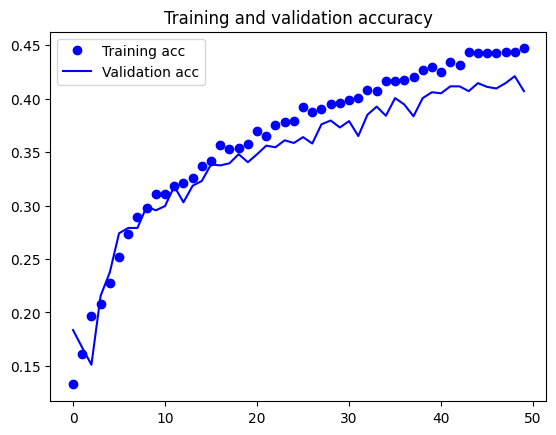

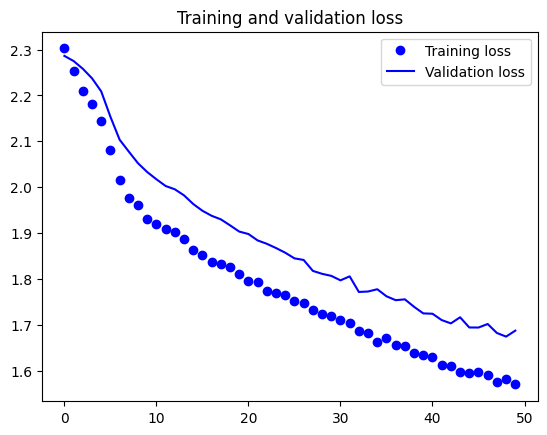

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.4586 - loss: 1.6249
test acc: 0.4399999976158142


### Model #7.1 (Non-Pretrain Full Training)

In [28]:
img_size = 200 # Changed Image Size 150 --> 200

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

In [29]:
# View all the layers of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 99, 99, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    17,334,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,635,850 (67.28 MB)

 Trainable params: 17,635,850 (67.28 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), # Changed learining rate 1e-5 --> 1e-4
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [61]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 96ms/step - acc: 0.1560 - loss: 2.7022 - val_acc: 0.3455 - val_loss: 2.2436
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - acc: 0.3461 - loss: 2.1352 - val_acc: 0.3925 - val_loss: 2.0273
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - acc: 0.3764 - loss: 1.9702 - val_acc: 0.4250 - val_loss: 1.8741
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - acc: 0.4284 - loss: 1.8069 - val_acc: 0.4355 - val_loss: 1.7647
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - acc: 0.4399 - loss: 1.7404 - val_acc: 0.4740 - val_loss: 1.6984
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - acc: 0.4480 - loss: 1.7020 - val_acc: 0.4900 - val_loss: 1.6280
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - acc: 0.4810 - loss: 1.6390 - val_acc: 0.5190 - val_loss: 1.5658
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - acc: 0.4922 - loss: 1.6018 - val_acc: 0.4895 - val_loss: 1.6061
Epoch 9/100
469/469 ━━━━━━━━━━━━

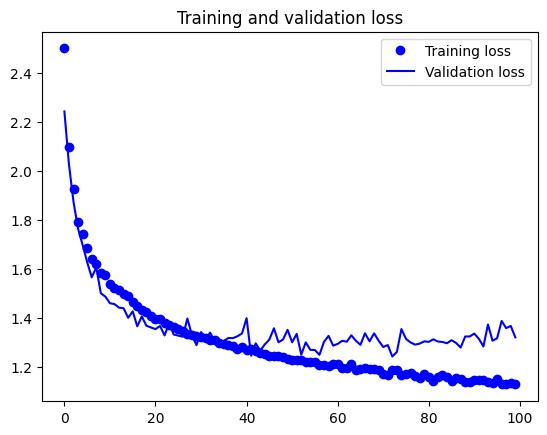

In [62]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [63]:
# Save the Model
model.save('food_model_7.h5')

In [64]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.6664 - loss: 1.4125
test acc: 0.6700000166893005


### Model #7.2 (Non-Pretrain Optimized)

In [31]:
# Fit the model on training data for 70 epochs
history = model.fit(
      train_generator,
      epochs=70,
      validation_data=validation_generator)

Epoch 1/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step - acc: 0.1523 - loss: 2.7221 - val_acc: 0.3435 - val_loss: 2.2816
Epoch 2/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - acc: 0.3180 - loss: 2.1615 - val_acc: 0.3665 - val_loss: 2.0370
Epoch 3/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - acc: 0.3605 - loss: 1.9681 - val_acc: 0.4500 - val_loss: 1.8208
Epoch 4/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - acc: 0.4038 - loss: 1.8357 - val_acc: 0.4705 - val_loss: 1.6806
Epoch 5/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - acc: 0.4281 - loss: 1.7455 - val_acc: 0.4850 - val_loss: 1.6433
Epoch 6/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - acc: 0.4472 - loss: 1.6871 - val_acc: 0.4750 - val_loss: 1.6807
Epoch 7/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - acc: 0.4630 - loss: 1.6595 - val_acc: 0.5015 - val_loss: 1.5989
Epoch 8/70
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - acc: 0.4677 - loss: 1.6402 - val_acc: 0.5050 - val_loss: 1.5722
Epoch 9/70
469/469 ━━━━━━━━━━━━━━━━━━━━

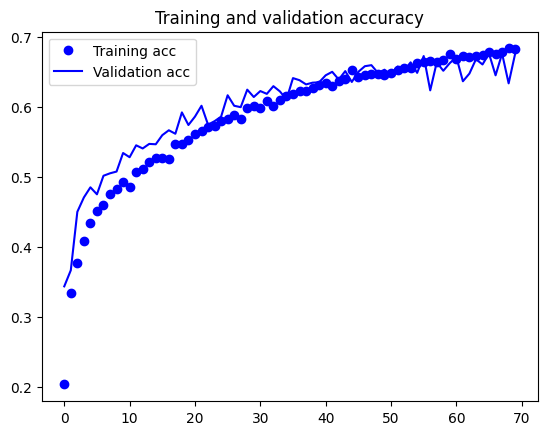

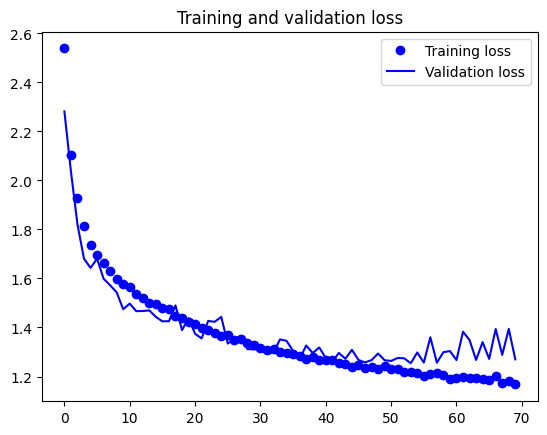

In [32]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.6908 - loss: 1.1972
test acc: 0.6700000166893005


### Model #8.1 (Non-Pretrain Full Training)

In [3]:
img_size = 300 #Changed Image Size 150 --> 300

model = models.Sequential()
model.add(layers.Input(shape=(img_size, img_size, 3)))  # Image Size 150 X 150 with 3 colour channels (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # Convolutional layer with 32 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Convolutional layer with 64 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Convolutional layer with 128 filters size 3 X 3 with ReLU activation
model.add(layers.MaxPooling2D((2, 2))) # MaxPooling layer to reduce dimensions by a factor of 2
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

I0000 00:00:1734006462.710875  647013 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [4]:
# View all the layers of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 825,866 (3.15 MB)

 Trainable params: 825,866 (3.15 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), 
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=16, 
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [39]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 183ms/step - acc: 0.5718 - loss: 1.3168 - val_acc: 0.6250 - val_loss: 1.2447
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - acc: 0.5838 - loss: 1.3007 - val_acc: 0.6205 - val_loss: 1.2227
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - acc: 0.5820 - loss: 1.2869 - val_acc: 0.6235 - val_loss: 1.2196
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - acc: 0.5829 - loss: 1.2967 - val_acc: 0.6200 - val_loss: 1.2198
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - acc: 0.5830 - loss: 1.2753 - val_acc: 0.6120 - val_loss: 1.2412
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 168ms/step - acc: 0.5956 - loss: 1.2628 - val_acc: 0.6365 - val_loss: 1.1901
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - acc: 0.5867 - loss: 1.2714 - val_acc: 0.6410 - val_loss: 1.1773
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - acc: 0.5928 - loss: 1.2539 - val_acc: 0.6275 - val_loss: 1.2024
Epoch 9/100
469/469 ━━━━

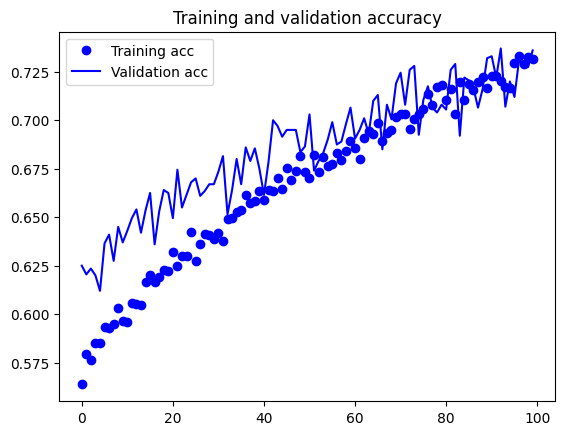

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
# Save the Model
model.save('food_model_8.h5')

In [42]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.7091 - loss: 0.8959
test acc: 0.7080000042915344


### Model #8.2 (Non-Pretrain Optimized)

In [7]:
# Fit the model on training data for 80 epochs
history = model.fit(
      train_generator,
      epochs=80,
      validation_data=validation_generator)

Epoch 1/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - acc: 0.2740 - loss: 2.3909 - val_acc: 0.3055 - val_loss: 2.3559
Epoch 2/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - acc: 0.3343 - loss: 2.2184 - val_acc: 0.3600 - val_loss: 2.2058
Epoch 3/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 163ms/step - acc: 0.3702 - loss: 2.1220 - val_acc: 0.3900 - val_loss: 2.0744
Epoch 4/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - acc: 0.3947 - loss: 2.0215 - val_acc: 0.4475 - val_loss: 1.9181
Epoch 5/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - acc: 0.4113 - loss: 1.9475 - val_acc: 0.4580 - val_loss: 1.8313
Epoch 6/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - acc: 0.4281 - loss: 1.8589 - val_acc: 0.4815 - val_loss: 1.7644
Epoch 7/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - acc: 0.4420 - loss: 1.8124 - val_acc: 0.5090 - val_loss: 1.6793
Epoch 8/80
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 165ms/step - acc: 0.4445 - loss: 1.7750 - val_acc: 0.4965 - val_loss: 1.6926
Epoch 9/80
469/469 ━━━━━━━━━━━━━

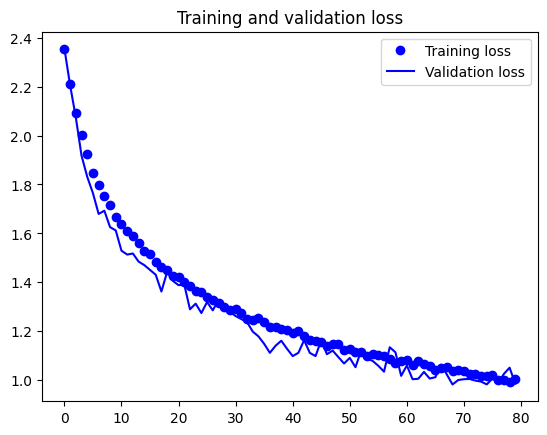

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.6493 - loss: 1.0461
test acc: 0.6579999923706055


### Model #9.1 (Baseline for Pretrained VGG16 Full Training)

In [10]:
# This is a VGG16 baseline model 
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [11]:
model = models.Sequential()
conv_base.trainable = False # To prevent any adjustment to the pre-trained weights of vgg16
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) #  Output layer with 10 neurons (for 10 classes) and softmax activation



In [12]:
# View all the layers of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 4,199,946 (16.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - acc: 0.3329 - loss: 1.8983 - val_acc: 0.6175 - val_loss: 1.1394
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - acc: 0.6095 - loss: 1.1550 - val_acc: 0.6370 - val_loss: 1.0611
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.6578 - loss: 0.9677 - val_acc: 0.6485 - val_loss: 1.0395
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - acc: 0.6951 - loss: 0.8934 - val_acc: 0.6755 - val_loss: 0.9964
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - acc: 0.7261 - loss: 0.7994 - val_acc: 0.6430 - val_loss: 1.1044
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.7445 - loss: 0.7462 - val_acc: 0.6730 - val_loss: 0.9875
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.7402 - loss: 0.7299 - val_acc: 0.6525 - val_loss: 1.0797
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - acc: 0.7764 - loss: 0.6592 - val_acc: 0.6660 - val_loss: 1.0673
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━

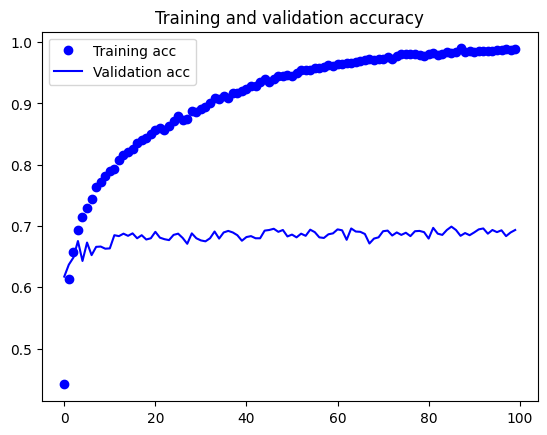

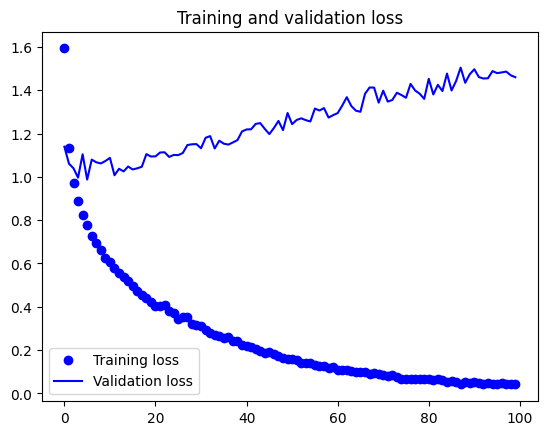

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_9.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - acc: 0.6901 - loss: 1.4404
test acc: 0.6840000152587891


### Model #9.2 (Baseline for Pretrained VGG16 Optimized)

In [14]:
# Fit the model on training data for 10 epochs
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - acc: 0.3452 - loss: 1.8867 - val_acc: 0.6225 - val_loss: 1.1253
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - acc: 0.5994 - loss: 1.1498 - val_acc: 0.6610 - val_loss: 1.0216
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - acc: 0.6591 - loss: 0.9966 - val_acc: 0.6620 - val_loss: 1.0097
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - acc: 0.7034 - loss: 0.8744 - val_acc: 0.6600 - val_loss: 1.0217
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - acc: 0.7126 - loss: 0.8168 - val_acc: 0.6640 - val_loss: 1.0035
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - acc: 0.7354 - loss: 0.7554 - val_acc: 0.6730 - val_loss: 0.9648
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - acc: 0.7556 - loss: 0.7096 - val_acc: 0.6740 - val_loss: 1.0138
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.7590 - loss: 0.6948 - val_acc: 0.6725 - val_loss: 0.9995
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9

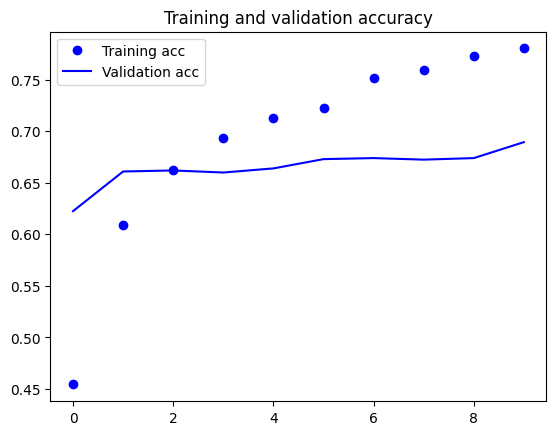

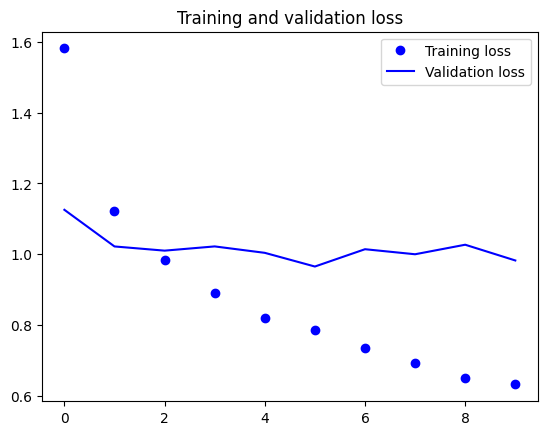

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.6816 - loss: 0.9616
test acc: 0.6779999732971191


### Model #10.1 (Pretrained VGG16 Full Training)

In [17]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [18]:
model = models.Sequential()
conv_base.trainable = False # To prevent any adjustment to the pre-trained weights of vgg16
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) #  Output layer with 10 neurons (for 10 classes) and softmax activation

In [19]:
# View all the layers of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 4,199,946 (16.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Added data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - acc: 0.2864 - loss: 2.0338 - val_acc: 0.5725 - val_loss: 1.2357
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5039 - loss: 1.4112 - val_acc: 0.5995 - val_loss: 1.1637
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - acc: 0.5565 - loss: 1.2744 - val_acc: 0.6280 - val_loss: 1.0731
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - acc: 0.5630 - loss: 1.2427 - val_acc: 0.6400 - val_loss: 1.0538
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5943 - loss: 1.2043 - val_acc: 0.6540 - val_loss: 1.0170
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.5941 - loss: 1.1556 - val_acc: 0.6310 - val_loss: 1.0632
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.6028 - loss: 1.1407 - val_acc: 0.6765 - val_loss: 0.9815
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - acc: 0.6029 - loss: 1.1413 - val_acc: 0.6735 - val_loss: 0.9602
Epoch 9/100
235/235 ━━━━

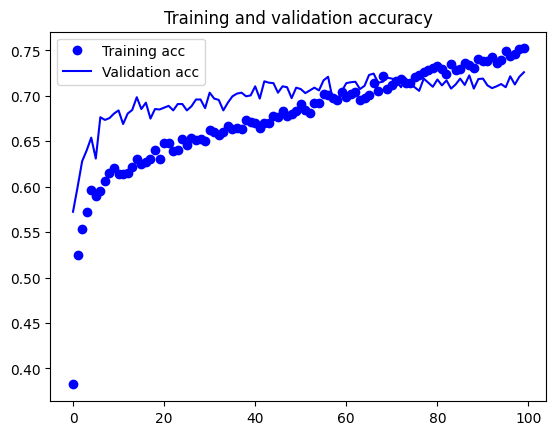

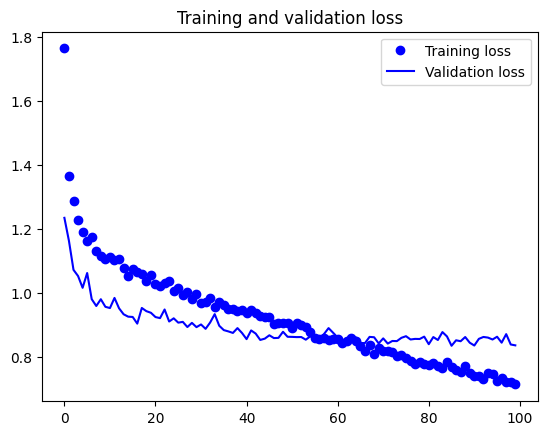

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_10.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.7064 - loss: 0.9056
test acc: 0.7120000123977661


### Model #10.2 (Pretrained VGG16 Optimized)

In [21]:
# Fit the model on training data for 70 epochs
history = model.fit(
      train_generator,
      epochs=70,
      validation_data=validation_generator)

Epoch 1/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - acc: 0.2848 - loss: 2.0517 - val_acc: 0.5775 - val_loss: 1.2383
Epoch 2/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.5074 - loss: 1.4125 - val_acc: 0.6200 - val_loss: 1.1602
Epoch 3/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.5535 - loss: 1.2985 - val_acc: 0.6360 - val_loss: 1.0656
Epoch 4/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.5770 - loss: 1.2394 - val_acc: 0.6370 - val_loss: 1.0502
Epoch 5/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - acc: 0.5972 - loss: 1.1837 - val_acc: 0.6520 - val_loss: 1.0089
Epoch 6/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - acc: 0.5780 - loss: 1.1915 - val_acc: 0.6560 - val_loss: 0.9979
Epoch 7/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.5971 - loss: 1.1585 - val_acc: 0.6755 - val_loss: 0.9725
Epoch 8/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - acc: 0.6035 - loss: 1.1517 - val_acc: 0.6625 - val_loss: 0.9917
Epoch 9/70
235/235 ━━━━━━━━━━━━━

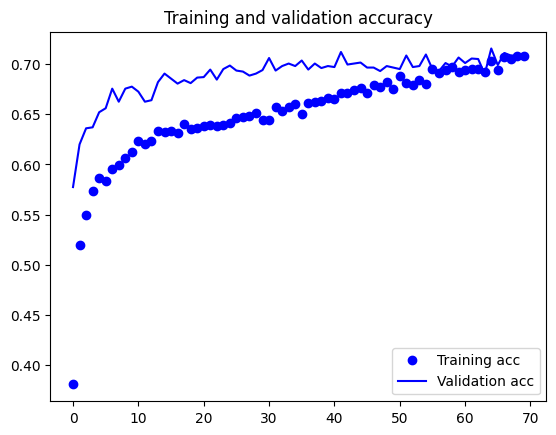

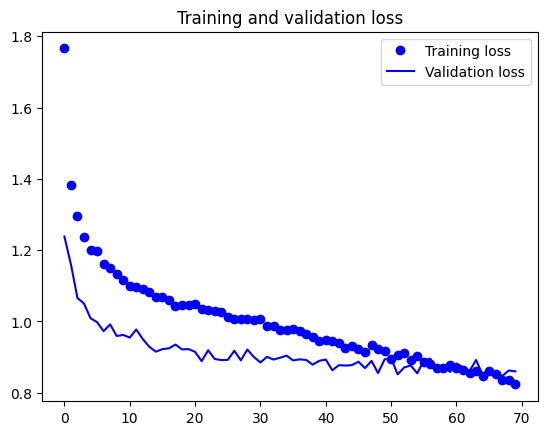

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - acc: 0.7367 - loss: 0.8100
test acc: 0.7319999933242798


### Model #11.1 (Pretrained VGG16 Full Training)

In [24]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [25]:
model = models.Sequential()
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) #  Output layer with 10 neurons (for 10 classes) and softmax activation

In [26]:
# Unfreeze layers in the VGG16 base starting from 'block5_conv1'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
# View all the layers of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 11,279,370 (43.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [28]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - acc: 0.4447 - loss: 1.5799 - val_acc: 0.6800 - val_loss: 0.9000
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.6736 - loss: 0.9406 - val_acc: 0.7465 - val_loss: 0.7472
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - acc: 0.7376 - loss: 0.7709 - val_acc: 0.7295 - val_loss: 0.7596
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.7482 - loss: 0.7024 - val_acc: 0.7350 - val_loss: 0.7951
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - acc: 0.7910 - loss: 0.6104 - val_acc: 0.7670 - val_loss: 0.6859
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.8144 - loss: 0.5404 - val_acc: 0.7790 - val_loss: 0.6920
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.8259 - loss: 0.4980 - val_acc: 0.7695 - val_loss: 0.7548
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.8465 - loss: 0.4434 - val_acc: 0.7745 - val_loss: 0.7628
Epoch 9/100
235/235 ━━━━

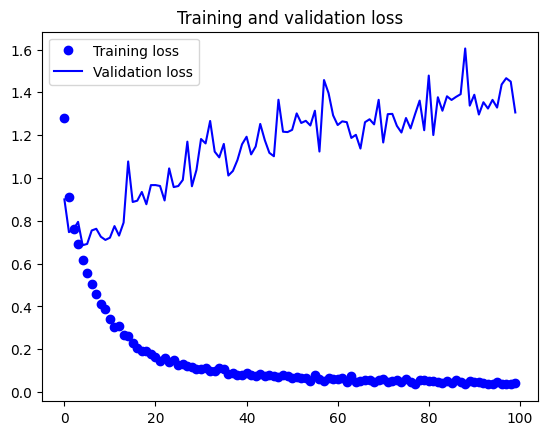

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_11.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.7926 - loss: 1.3205
test acc: 0.8059999942779541


### Model #11.2 (Pretrained VGG16 Optimized)

In [29]:
# Fit the model on training data for 15 epochs
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - acc: 0.4613 - loss: 1.5397 - val_acc: 0.7140 - val_loss: 0.8370
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - acc: 0.6834 - loss: 0.9141 - val_acc: 0.7560 - val_loss: 0.7582
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.7219 - loss: 0.7825 - val_acc: 0.7650 - val_loss: 0.7509
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.7541 - loss: 0.6933 - val_acc: 0.7745 - val_loss: 0.7049
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.7763 - loss: 0.6306 - val_acc: 0.7825 - val_loss: 0.7026
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.8206 - loss: 0.5285 - val_acc: 0.7880 - val_loss: 0.6919
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.8374 - loss: 0.4702 - val_acc: 0.7880 - val_loss: 0.7094
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - acc: 0.8520 - loss: 0.4312 - val_acc: 0.7845 - val_loss: 0.7071
Epoch 9/15
235/235 ━━━━━━━━━━━━━

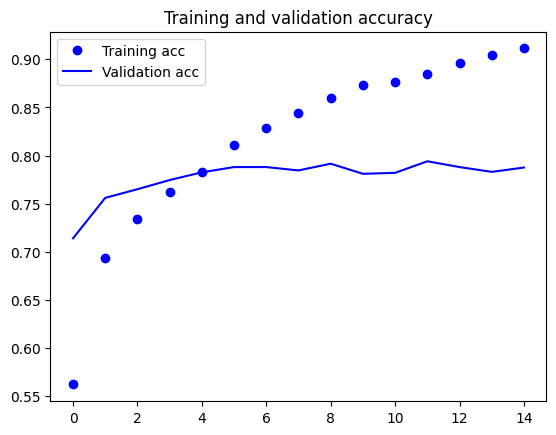

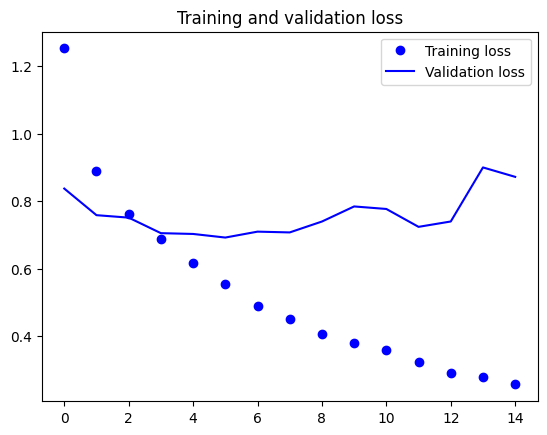

In [30]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7775 - loss: 0.8505
test acc: 0.7699999809265137


### Model #12.1 (Pretrained VGG16 Full Training)

In [32]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [33]:
model = models.Sequential()
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Dropout(0.5)) # Added dropout layer
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu')) # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and softmax activation

In [34]:
# Unfreeze layers in the VGG16 base starting from 'block5_conv1'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [35]:
# View all the layers of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 11,279,370 (43.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [36]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

# Added data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 116ms/step - acc: 0.1688 - loss: 2.3737 - val_acc: 0.5500 - val_loss: 1.3643
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.4485 - loss: 1.5521 - val_acc: 0.6385 - val_loss: 1.0437
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.5618 - loss: 1.2359 - val_acc: 0.6860 - val_loss: 0.9182
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - acc: 0.6142 - loss: 1.0924 - val_acc: 0.7090 - val_loss: 0.8618
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.6404 - loss: 1.0455 - val_acc: 0.7095 - val_loss: 0.8291
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - acc: 0.6627 - loss: 0.9661 - val_acc: 0.7180 - val_loss: 0.8124
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.6850 - loss: 0.9216 - val_acc: 0.7345 - val_loss: 0.7681
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.6873 - loss: 0.8729 - val_acc: 0.7450 - val_loss: 0.7438
Epoch 9/100
235/235 ━━━━

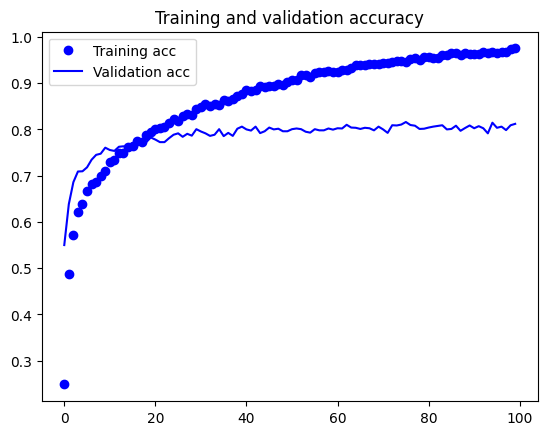

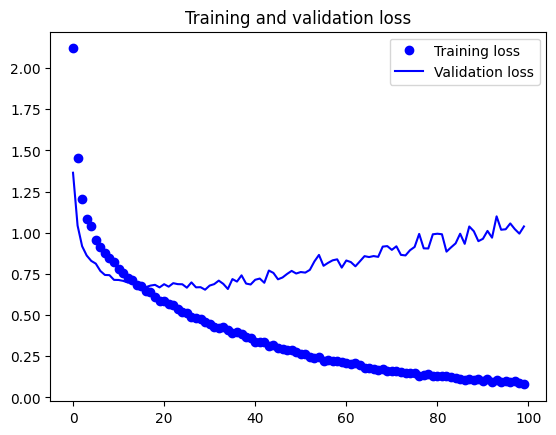

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_12.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.8060 - loss: 1.0378
test acc: 0.8240000009536743


### Model #12.2 (Pretrained VGG16 Optimized)

In [37]:
# Fit the model on training data for 20 epochs
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - acc: 0.1597 - loss: 2.4709 - val_acc: 0.4765 - val_loss: 1.5011
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.4466 - loss: 1.6153 - val_acc: 0.6170 - val_loss: 1.1173
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.5466 - loss: 1.2647 - val_acc: 0.6785 - val_loss: 0.9445
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.6089 - loss: 1.1157 - val_acc: 0.7150 - val_loss: 0.8759
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.6333 - loss: 1.0504 - val_acc: 0.7140 - val_loss: 0.8573
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.6561 - loss: 0.9814 - val_acc: 0.7420 - val_loss: 0.7912
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.6699 - loss: 0.9296 - val_acc: 0.7435 - val_loss: 0.7655
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.6795 - loss: 0.8960 - val_acc: 0.7535 - val_loss: 0.7412
Epoch 9/20
235/235 ━━━━━━━━━━━━━

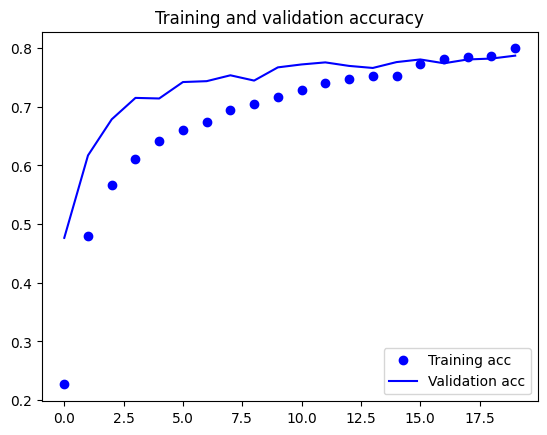

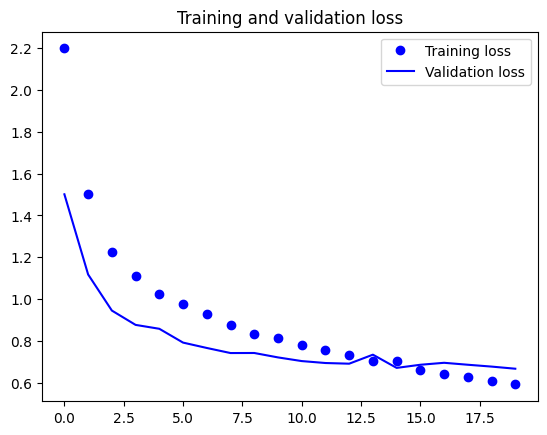

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8145 - loss: 0.6064
test acc: 0.7940000295639038


### Model #13.1 (Pretrained VGG16 Full Training)

In [40]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [41]:
model = models.Sequential()
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Dense layer with 512 neurons and ReLU activation with L2 regularization
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
# Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [42]:
# Unfreeze layers in the VGG16 base starting from 'block5_conv1'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
# View all the layers of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,914,634 (72.15 MB)

 Trainable params: 11,279,370 (43.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [44]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), # Changed learning rate 1e-4 --> 1e-5
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - acc: 0.1703 - loss: 11.9982 - val_acc: 0.5280 - val_loss: 10.4969
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.4652 - loss: 10.4992 - val_acc: 0.6255 - val_loss: 9.6577
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - acc: 0.5635 - loss: 9.7439 - val_acc: 0.6705 - val_loss: 9.0878
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - acc: 0.6107 - loss: 9.1472 - val_acc: 0.7070 - val_loss: 8.5795
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.6290 - loss: 8.6499 - val_acc: 0.7120 - val_loss: 8.1508
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.6528 - loss: 8.2083 - val_acc: 0.7145 - val_loss: 7.7895
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.6844 - loss: 7.7749 - val_acc: 0.7455 - val_loss: 7.3637
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.6859 - loss: 7.4260 - val_acc: 0.7475 - val_loss: 7.0353
Epoch 9/100
235/235 ━

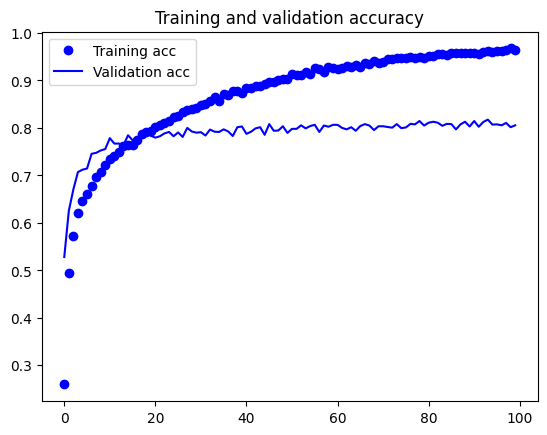

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_13.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.8288 - loss: 1.1255
test acc: 0.8119999766349792


### Model #13.2 (Pretrained VGG16 Optimized)

In [45]:
# Fit the model on training data for 20 epochs
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 126ms/step - acc: 0.1608 - loss: 11.9858 - val_acc: 0.4760 - val_loss: 10.5341
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - acc: 0.4300 - loss: 10.5161 - val_acc: 0.6240 - val_loss: 9.5574
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5435 - loss: 9.6350 - val_acc: 0.6835 - val_loss: 8.9537
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.5946 - loss: 9.0384 - val_acc: 0.6980 - val_loss: 8.4874
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.6286 - loss: 8.5431 - val_acc: 0.6985 - val_loss: 8.0900
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - acc: 0.6482 - loss: 8.1245 - val_acc: 0.7110 - val_loss: 7.7157
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.6759 - loss: 7.7117 - val_acc: 0.7230 - val_loss: 7.3571
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.6990 - loss: 7.3609 - val_acc: 0.7400 - val_loss: 7.0246
Epoch 9/20
235/235 ━━━━━━━━━━

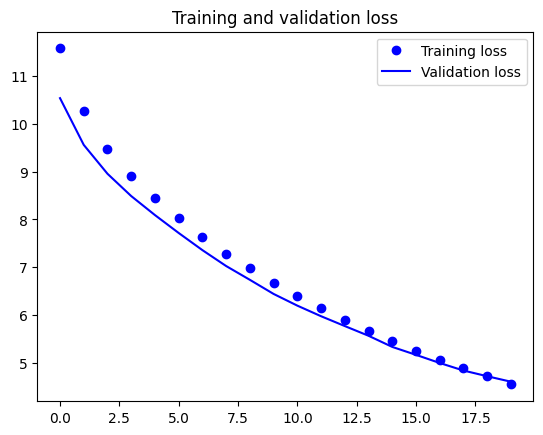

In [46]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7897 - loss: 4.5685
test acc: 0.7919999957084656


### Model #14.1 (Pretrained VGG16 Full Training)

In [48]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [49]:
model = models.Sequential()
model.add(conv_base) # Add more layers to vgg16 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Dense layer with 256 neurons and ReLU activation with L2 regularization (changed number of neurons 512 --> 256)
model.add(layers.Dropout(0.5)) # Added dropout layer between dense layers
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
# Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [50]:
# Unfreeze layers in the VGG16 base starting from 'block5_conv1'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [51]:
# View all the layers of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,666 (64.14 MB)

 Trainable params: 9,179,402 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [52]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - acc: 0.1180 - loss: 7.8934 - val_acc: 0.3540 - val_loss: 6.7942
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.2279 - loss: 6.8582 - val_acc: 0.5035 - val_loss: 6.0531
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3588 - loss: 6.1935 - val_acc: 0.5680 - val_loss: 5.4783
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.4542 - loss: 5.6629 - val_acc: 0.6275 - val_loss: 5.0438
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - acc: 0.5048 - loss: 5.2595 - val_acc: 0.6510 - val_loss: 4.7324
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.5518 - loss: 4.9514 - val_acc: 0.6855 - val_loss: 4.4443
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - acc: 0.5719 - loss: 4.6562 - val_acc: 0.7015 - val_loss: 4.2066
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.6083 - loss: 4.4013 - val_acc: 0.7100 - val_loss: 4.0099
Epoch 9/100
235/235 ━━━━

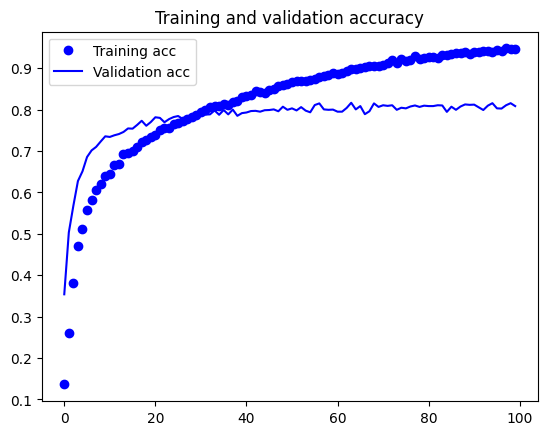

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_14.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7890 - loss: 1.2286
test acc: 0.8080000281333923


### Model #14.2 (Pretrained VGG16 Optimized)

In [53]:
# Fit the model on training data for 30 epochs
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - acc: 0.1177 - loss: 7.8351 - val_acc: 0.3135 - val_loss: 6.7861
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2229 - loss: 6.8755 - val_acc: 0.4895 - val_loss: 6.0897
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.3558 - loss: 6.2259 - val_acc: 0.5655 - val_loss: 5.5201
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.4389 - loss: 5.7348 - val_acc: 0.6220 - val_loss: 5.0961
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5123 - loss: 5.3076 - val_acc: 0.6515 - val_loss: 4.7515
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5509 - loss: 4.9905 - val_acc: 0.6690 - val_loss: 4.4929
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.5924 - loss: 4.6879 - val_acc: 0.6885 - val_loss: 4.2534
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - acc: 0.6012 - loss: 4.4670 - val_acc: 0.7005 - val_loss: 4.0600
Epoch 9/30
235/235 ━━━━━━━━━━━━━

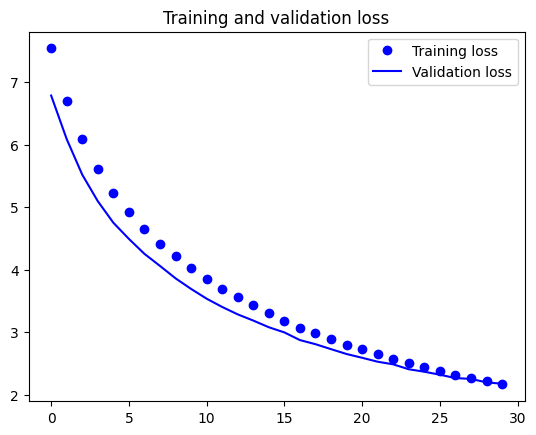

In [54]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [55]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8216 - loss: 2.1239
test acc: 0.8100000023841858


### Model #15.1 (Pretrained VGG16 Full Training)

In [56]:
img_size = 150

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [57]:
model = models.Sequential()
model.add(conv_base)  # Add more layers to vgg16 base
model.add(layers.Dropout(0.6)) # Changed Dropout rate 0.5 --> 0.6
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Dense layer with 256 neurons and ReLU activation with L2 regularization 
model.add(layers.Dropout(0.6)) # Changed Dropout rate 0.5 --> 0.6
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01))) 
# Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [58]:
# Unfreeze layers in the VGG16 base starting from 'block5_conv1'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True 
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [59]:
# View all the layers of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,666 (64.14 MB)

 Trainable params: 9,179,402 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [60]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 130ms/step - acc: 0.1088 - loss: 8.0770 - val_acc: 0.2755 - val_loss: 6.9492
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - acc: 0.1398 - loss: 7.0036 - val_acc: 0.3495 - val_loss: 6.3698
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2352 - loss: 6.3725 - val_acc: 0.4260 - val_loss: 5.6796
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - acc: 0.3340 - loss: 5.7797 - val_acc: 0.5030 - val_loss: 5.1164
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.3852 - loss: 5.2700 - val_acc: 0.5840 - val_loss: 4.6333
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.4245 - loss: 4.8427 - val_acc: 0.6145 - val_loss: 4.2463
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - acc: 0.4828 - loss: 4.4352 - val_acc: 0.6275 - val_loss: 3.9117
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.5205 - loss: 4.1104 - val_acc: 0.6580 - val_loss: 3.5997
Epoch 9/100
235/235 ━━━━

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_15.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.8198 - loss: 1.0046
test acc: 0.8180000185966492


### Model #15.2 (Pretrained VGG16 Optimized)

In [61]:
# Fit the model on training data for 40 epochs
history = model.fit(
      train_generator,
      epochs=40,
      validation_data=validation_generator)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step - acc: 0.1052 - loss: 8.2022 - val_acc: 0.2385 - val_loss: 6.9521
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 116ms/step - acc: 0.1420 - loss: 6.9900 - val_acc: 0.2835 - val_loss: 6.4359
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.2262 - loss: 6.3965 - val_acc: 0.3920 - val_loss: 5.8128
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.3137 - loss: 5.8361 - val_acc: 0.4920 - val_loss: 5.1857
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3817 - loss: 5.3319 - val_acc: 0.5425 - val_loss: 4.6787
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.4306 - loss: 4.8924 - val_acc: 0.5975 - val_loss: 4.2768
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.4778 - loss: 4.4723 - val_acc: 0.6325 - val_loss: 3.9244
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.5110 - loss: 4.1307 - val_acc: 0.6405 - val_loss: 3.6302
Epoch 9/40
235/235 ━━━━━━━━━━━━━

In [62]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [63]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8024 - loss: 1.4972
test acc: 0.8180000185966492


### Model #16.1 (Baseline for Pretrained ResNet50 Full Training)

In [64]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [65]:
model = models.Sequential()
# to prevent any adjustment to the pre-trained weights of ResNet50
conv_base.trainable = False
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu'))  # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and softmax activation

In [66]:
# View all the layers of the model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 26,220,042 (100.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [67]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255) # Rescale train pixel values 

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100


2024-12-11 16:33:50.293370: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng13{} for conv (f32[32,256,38,38]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,38,38]{3,2,1,0}, f32[256,64,1,1]{3,2,1,0}, f32[256]{0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2024-12-11 16:33:50.318663: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.151935587s
Trying algorithm eng13{} for conv (f32[32,256,38,38]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,38,38]{3,2,1,0}, f32[256,64,1,1]{3,2,1,0}, f32[256]{0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend

235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - acc: 0.1289 - loss: 2.4758 - val_acc: 0.2150 - val_loss: 2.1649
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - acc: 0.2041 - loss: 2.1596 - val_acc: 0.2610 - val_loss: 2.0814
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - acc: 0.2464 - loss: 2.0827 - val_acc: 0.2790 - val_loss: 2.0362
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - acc: 0.2639 - loss: 2.0277 - val_acc: 0.2115 - val_loss: 2.1837
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.2927 - loss: 1.9759 - val_acc: 0.2610 - val_loss: 2.1127
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - acc: 0.2869 - loss: 1.9659 - val_acc: 0.2895 - val_loss: 2.0007
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - acc: 0.2967 - loss: 1.9419 - val_acc: 0.2955 - val_loss: 2.0013
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - acc: 0.3287 - loss: 1.8904 - val_acc: 0.2920 - val_loss: 2.0427
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 40

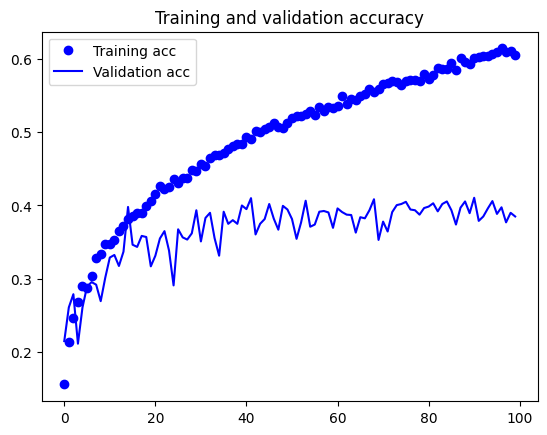

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_16.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.3790 - loss: 2.0094
test acc: 0.38199999928474426


### Model #16.2 (Baseline for Pretrained ResNet50 Optimized)

In [68]:
# Fit the model on training data for 15 epochs
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - acc: 0.1438 - loss: 2.4822 - val_acc: 0.1915 - val_loss: 2.1375
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - acc: 0.2133 - loss: 2.1805 - val_acc: 0.2715 - val_loss: 2.1321
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.2349 - loss: 2.1094 - val_acc: 0.2190 - val_loss: 2.1116
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - acc: 0.2705 - loss: 2.0365 - val_acc: 0.2605 - val_loss: 2.0390
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - acc: 0.2807 - loss: 1.9950 - val_acc: 0.2495 - val_loss: 2.1161
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - acc: 0.3019 - loss: 1.9561 - val_acc: 0.2520 - val_loss: 2.0721
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.3078 - loss: 1.9501 - val_acc: 0.3050 - val_loss: 1.9674
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - acc: 0.3229 - loss: 1.8958 - val_acc: 0.2935 - val_loss: 2.0020
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 5

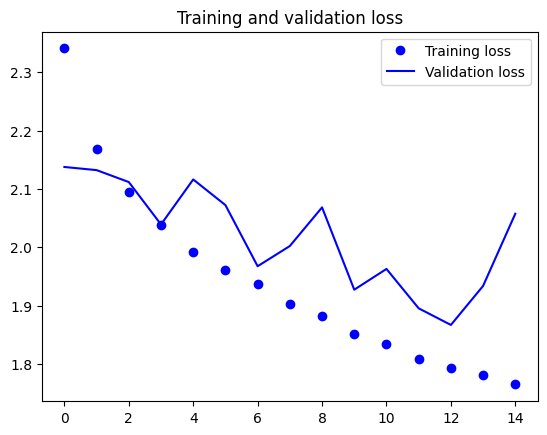

In [69]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [70]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.2804 - loss: 2.0120
test acc: 0.28999999165534973


### Model #17.1 (Pretrained ResNet50 Full Training)

In [71]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [72]:
model = models.Sequential()
# to prevent any adjustment to the pre-trained weights of ResNet50
conv_base.trainable = False
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Added dropout layer
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu'))  # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and softmax activation

In [73]:
# View all the layers of the model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 26,220,042 (100.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [74]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), 
              metrics=['acc'])

# Added data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 154ms/step - acc: 0.1132 - loss: 2.5199 - val_acc: 0.1960 - val_loss: 2.1845
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.1644 - loss: 2.2572 - val_acc: 0.2320 - val_loss: 2.1533
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.1764 - loss: 2.2280 - val_acc: 0.2140 - val_loss: 2.1329
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.1923 - loss: 2.2068 - val_acc: 0.2560 - val_loss: 2.0913
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.2006 - loss: 2.1688 - val_acc: 0.2490 - val_loss: 2.1014
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - acc: 0.2080 - loss: 2.1679 - val_acc: 0.2265 - val_loss: 2.0788
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - acc: 0.1992 - loss: 2.1628 - val_acc: 0.2695 - val_loss: 2.0746
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.2133 - loss: 2.1394 - val_acc: 0.2560 - val_loss: 2.0468
Epoch 9/100
235/235 ━━━━

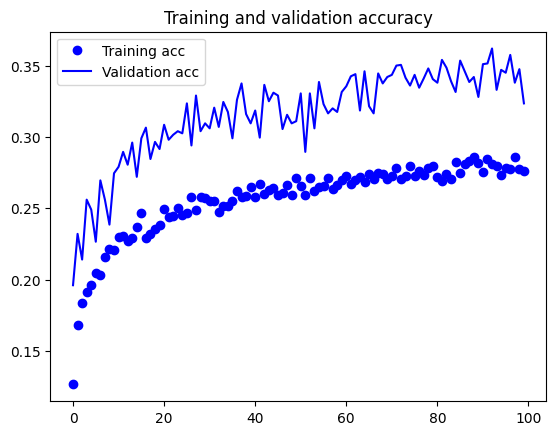

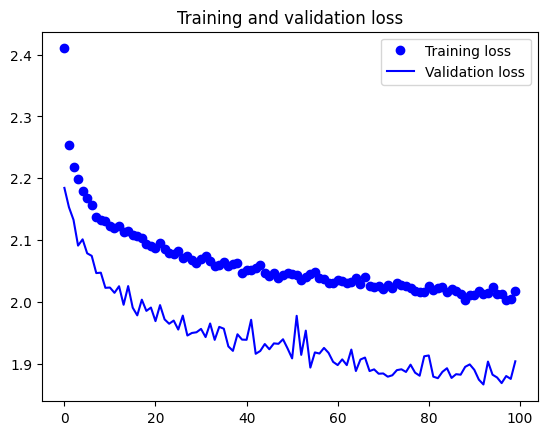

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_17.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.3326 - loss: 1.9064
test acc: 0.33399999141693115


### Model #17.2 (Pretrained ResNet50 Optimized)

In [75]:
# Fit the model on training data for 30 epochs
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 126ms/step - acc: 0.1115 - loss: 2.5111 - val_acc: 0.1825 - val_loss: 2.1987
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.1632 - loss: 2.2619 - val_acc: 0.2280 - val_loss: 2.1584
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.1731 - loss: 2.2203 - val_acc: 0.2050 - val_loss: 2.1354
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.1834 - loss: 2.2137 - val_acc: 0.2225 - val_loss: 2.1207
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.1877 - loss: 2.1961 - val_acc: 0.2565 - val_loss: 2.0928
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - acc: 0.1975 - loss: 2.1811 - val_acc: 0.2520 - val_loss: 2.0825
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.2065 - loss: 2.1681 - val_acc: 0.2635 - val_loss: 2.0605
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.2270 - loss: 2.1442 - val_acc: 0.2565 - val_loss: 2.0470
Epoch 9/30
235/235 ━━━━━━━━━━━━━

In [76]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [77]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.2858 - loss: 1.9448
test acc: 0.30000001192092896


### Model #18.1 (Pretrained ResNet50 Full Training)

In [78]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [79]:
model = models.Sequential()
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu'))  # Dense layer with 512 neurons and ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes) and softmax activation

In [80]:
# Unfreeze layers in the ResNet50 base starting from 'conv5_block1_1_conv'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [81]:
# View all the layers of the model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 41,196,042 (157.15 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [82]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), 
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
151/235 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - acc: 0.1370 - loss: 2.9318

2024-12-11 17:41:03.193497: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng35{k2=2,k3=0} for conv (f32[12,2048,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[12,512,5,5]{3,2,1,0}, f32[2048,512,1,1]{3,2,1,0}, f32[2048]{0}, f32[12,2048,5,5]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":1},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2024-12-11 17:41:03.194864: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.508445383s
Trying algorithm eng35{k2=2,k3=0} for conv (f32[12,2048,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[12,512,5,5]{3,2,1,0}, f32[2048,512,1,1]{3,2,1,0}, f32[2048]{0}, f32[12,2048,5,5]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_targe

235/235 ━━━━━━━━━━━━━━━━━━━━ 60s 173ms/step - acc: 0.1465 - loss: 2.7435 - val_acc: 0.2055 - val_loss: 2.1678
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - acc: 0.2237 - loss: 2.1251 - val_acc: 0.2375 - val_loss: 2.2316
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - acc: 0.2468 - loss: 2.0673 - val_acc: 0.3145 - val_loss: 1.9144
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - acc: 0.2702 - loss: 2.0433 - val_acc: 0.3000 - val_loss: 2.0565
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - acc: 0.2639 - loss: 2.0204 - val_acc: 0.2855 - val_loss: 2.1259
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - acc: 0.2827 - loss: 1.9829 - val_acc: 0.2715 - val_loss: 2.1161
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - acc: 0.2942 - loss: 1.9549 - val_acc: 0.2610 - val_loss: 2.0508
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - acc: 0.2999 - loss: 1.9304 - val_acc: 0.3420 - val_loss: 1.8308
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━

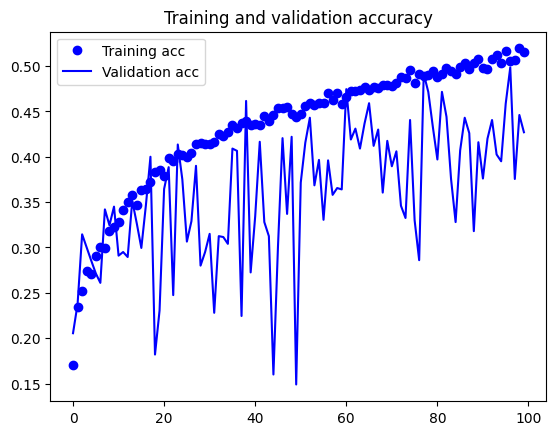

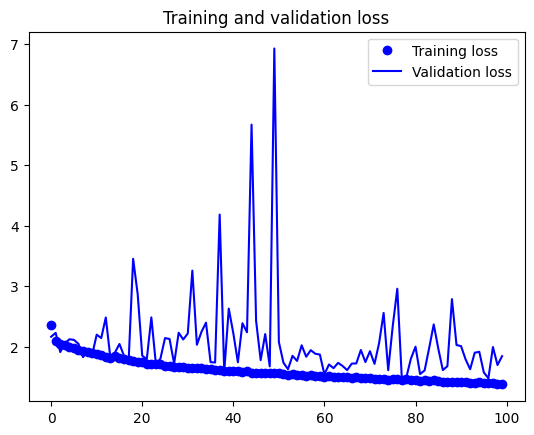

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_18.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.4738 - loss: 1.6831
test acc: 0.45399999618530273


### Model #18.2 (Pretrained ResNet50 Optimized)

In [83]:
# Fit the model on training data for 30 epochs
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 149ms/step - acc: 0.1529 - loss: 2.7088 - val_acc: 0.2290 - val_loss: 2.1356
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2242 - loss: 2.1501 - val_acc: 0.2645 - val_loss: 2.0435
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2533 - loss: 2.0594 - val_acc: 0.2735 - val_loss: 2.0258
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - acc: 0.2639 - loss: 2.0436 - val_acc: 0.3085 - val_loss: 1.9617
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.2861 - loss: 1.9985 - val_acc: 0.3040 - val_loss: 1.9657
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.2680 - loss: 1.9980 - val_acc: 0.2670 - val_loss: 1.9865
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3027 - loss: 1.9556 - val_acc: 0.2620 - val_loss: 2.0832
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.3165 - loss: 1.9325 - val_acc: 0.1895 - val_loss: 3.3173
Epoch 9/30
235/235 ━━━━━━━━━━━━━

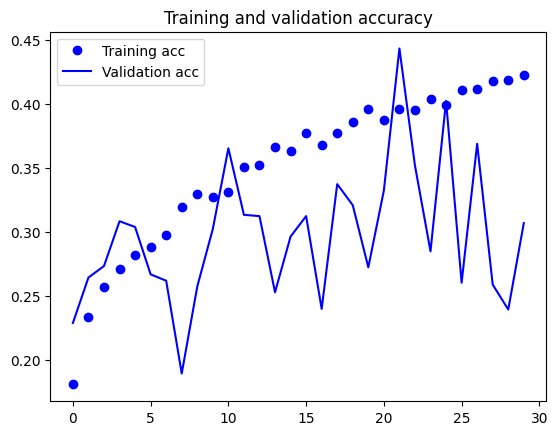

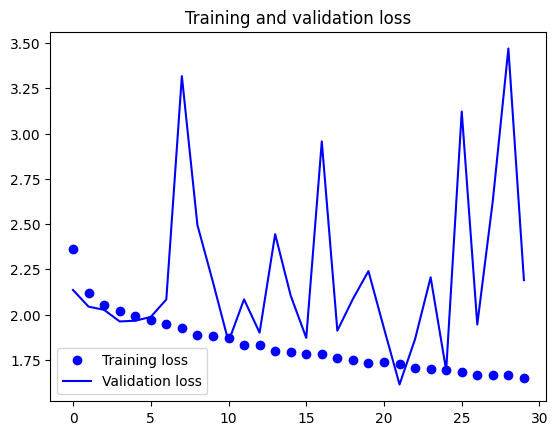

In [84]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [85]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.2828 - loss: 2.1901
test acc: 0.2879999876022339


### Model #19.1 (Pretrained ResNet50 Full Training)

In [86]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [87]:
model = models.Sequential()
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with 512 neurons and ReLU activation with L2 regularization
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))  # Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [88]:
# Unfreeze layers in the ResNet50 base starting from 'conv5_block1_1_conv'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [89]:
# View all the layers of the model
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 41,196,042 (157.15 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [90]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4), 
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1733914408.783769  246686 service.cc:148] XLA service 0x7f1890003a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733914408.784236  246686 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-11 18:53:29.031328: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733914410.385460  246686 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1733914418.588080  246686 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - acc: 0.1523 - loss: 10.0866

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 205ms/step - acc: 0.1524 - loss: 10.0780 - val_acc: 0.1590 - val_loss: 5.9286
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.2289 - loss: 5.3593 - val_acc: 0.2645 - val_loss: 4.2236
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 119ms/step - acc: 0.2609 - loss: 3.9888 - val_acc: 0.3080 - val_loss: 3.3022
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.2717 - loss: 3.2728 - val_acc: 0.1745 - val_loss: 3.5702
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2921 - loss: 2.8587 - val_acc: 0.1470 - val_loss: 3.6414
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - acc: 0.2954 - loss: 2.5893 - val_acc: 0.3160 - val_loss: 2.4433
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.3243 - loss: 2.3814 - val_acc: 0.2235 - val_loss: 2.7198
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.3171 - loss: 2.2733 - val_acc: 0.3810 - val_loss: 2.1421
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━

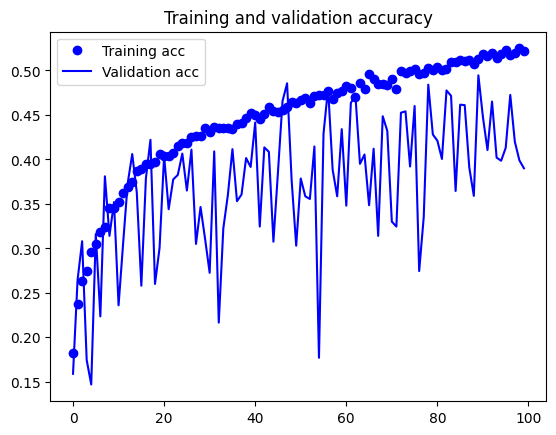

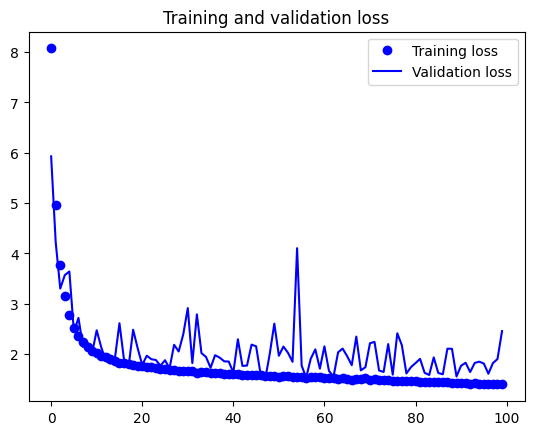

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_19.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - acc: 0.3620 - loss: 2.4715
test acc: 0.39399999380111694


### Model #19.2 (Pretrained ResNet50 Optimized)

In [91]:
# Fit the model on training data for 30 epochs
history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step - acc: 0.1611 - loss: 10.1431 - val_acc: 0.2135 - val_loss: 5.9889
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - acc: 0.2412 - loss: 5.4679 - val_acc: 0.2935 - val_loss: 4.3077
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2712 - loss: 4.0383 - val_acc: 0.2870 - val_loss: 3.3551
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2789 - loss: 3.2869 - val_acc: 0.3330 - val_loss: 2.8593
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 117ms/step - acc: 0.3022 - loss: 2.8458 - val_acc: 0.2450 - val_loss: 3.0246
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - acc: 0.3196 - loss: 2.5749 - val_acc: 0.1790 - val_loss: 3.0592
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3191 - loss: 2.3992 - val_acc: 0.3465 - val_loss: 2.3103
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3342 - loss: 2.2437 - val_acc: 0.3470 - val_loss: 2.1474
Epoch 9/30
235/235 ━━━━━━━━━━━━

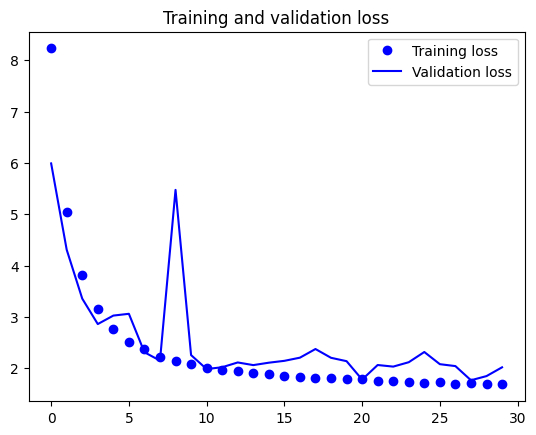

In [92]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [93]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - acc: 0.3565 - loss: 2.0362
test acc: 0.38600000739097595


### Model #20.1 (Pretrained ResNet50 Full Training)

In [94]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

In [95]:
model = models.Sequential()
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with 512 neurons and ReLU activation with L2 regularization
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))  # Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [96]:
# Unfreeze layers in the ResNet50 base starting from 'conv5_block1_1_conv'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [97]:
# View all the layers of the model
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 41,196,042 (157.15 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [98]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), # Changed learning rate 1e-4 --> 1e-5
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - acc: 0.1394 - loss: 12.7074 - val_acc: 0.1625 - val_loss: 11.4557
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.2093 - loss: 11.2165 - val_acc: 0.2750 - val_loss: 10.4511
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.2414 - loss: 10.3742 - val_acc: 0.3000 - val_loss: 9.7627
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - acc: 0.2667 - loss: 9.6761 - val_acc: 0.3335 - val_loss: 9.1037
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2782 - loss: 9.0719 - val_acc: 0.3110 - val_loss: 8.5837
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.2892 - loss: 8.5417 - val_acc: 0.3500 - val_loss: 8.0600
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - acc: 0.2992 - loss: 8.0746 - val_acc: 0.3520 - val_loss: 7.6675
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2990 - loss: 7.6479 - val_acc: 0.3585 - val_loss: 7.2365
Epoch 9/100
235/235

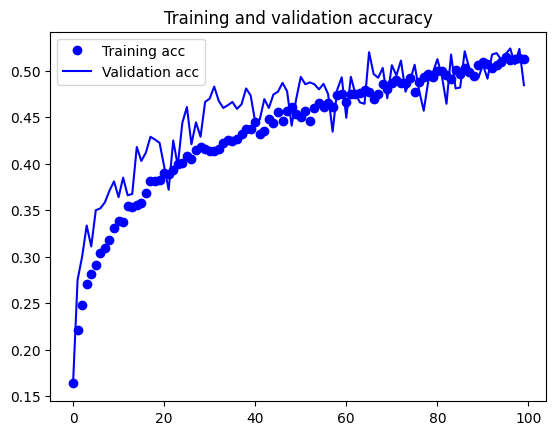

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_20.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.4773 - loss: 1.7614
test acc: 0.4860000014305115


### Model #20.2 (Pretrained ResNet50 Optimized)

In [99]:
# Fit the model on training data for 80 epochs
history = model.fit(
      train_generator,
      epochs=80,
      validation_data=validation_generator)

Epoch 1/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - acc: 0.1395 - loss: 12.7254 - val_acc: 0.1750 - val_loss: 11.4287
Epoch 2/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2245 - loss: 11.2316 - val_acc: 0.3050 - val_loss: 10.4480
Epoch 3/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2353 - loss: 10.4164 - val_acc: 0.3010 - val_loss: 9.7384
Epoch 4/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - acc: 0.2806 - loss: 9.6848 - val_acc: 0.3240 - val_loss: 9.1059
Epoch 5/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2791 - loss: 9.0951 - val_acc: 0.3325 - val_loss: 8.5833
Epoch 6/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2849 - loss: 8.5653 - val_acc: 0.3470 - val_loss: 8.0650
Epoch 7/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.3106 - loss: 8.0576 - val_acc: 0.3345 - val_loss: 7.6317
Epoch 8/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - acc: 0.3089 - loss: 7.6066 - val_acc: 0.3740 - val_loss: 7.1849
Epoch 9/80
235/235 ━━━━━━━━

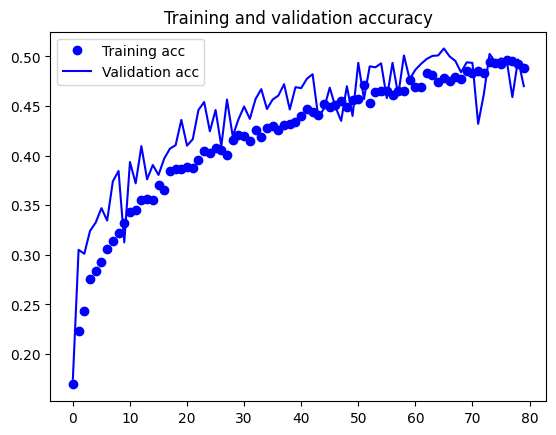

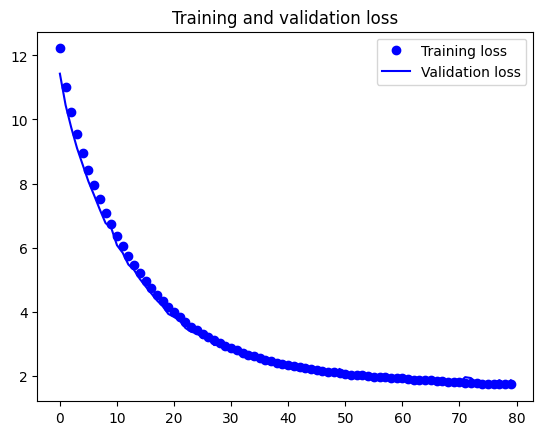

In [100]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.4755 - loss: 1.8126
test acc: 0.4620000123977661


### Model #21.1 (Pretrained ResNet50 Full Training)

In [3]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

I0000 00:00:1734107393.977174   14387 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [4]:
model = models.Sequential()
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with 512 neurons and ReLU activation with L2 regularization
model.add(layers.Dropout(0.5)) # Added dropout layer between dense layers
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))  # Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [5]:
# Unfreeze layers in the ResNet50 base starting from 'conv5_block1_1_conv'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
# View all the layers of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 41,196,042 (157.15 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [105]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), 
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 175ms/step - acc: 0.1194 - loss: 13.2773 - val_acc: 0.1960 - val_loss: 11.4417
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.1599 - loss: 11.3427 - val_acc: 0.2330 - val_loss: 10.6657
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.1771 - loss: 10.5762 - val_acc: 0.2525 - val_loss: 9.9926
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.1948 - loss: 9.9409 - val_acc: 0.2680 - val_loss: 9.4486
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - acc: 0.2068 - loss: 9.3862 - val_acc: 0.2870 - val_loss: 8.9162
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.2119 - loss: 8.9060 - val_acc: 0.2915 - val_loss: 8.4402
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - acc: 0.2266 - loss: 8.4387 - val_acc: 0.2920 - val_loss: 8.0104
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.2468 - loss: 7.9989 - val_acc: 0.3185 - val_loss: 7.5829
Epoch 9/100
235/235

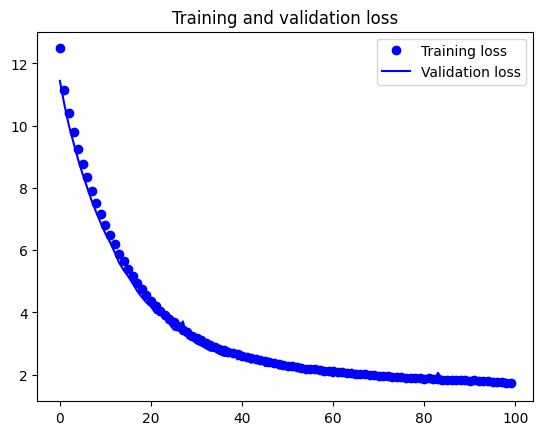

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_21.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.5066 - loss: 1.6676
test acc: 0.515999972820282


### Model #21.2 (Pretrained ResNet50 Optimized)

In [106]:
# Fit the model on training data for 80 epochs
history = model.fit(
      train_generator,
      epochs=80,
      validation_data=validation_generator)

Epoch 1/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 52s 157ms/step - acc: 0.1293 - loss: 13.1878 - val_acc: 0.1825 - val_loss: 11.3869
Epoch 2/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.1697 - loss: 11.2490 - val_acc: 0.2410 - val_loss: 10.5473
Epoch 3/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.1881 - loss: 10.4756 - val_acc: 0.2490 - val_loss: 9.8879
Epoch 4/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.1919 - loss: 9.8506 - val_acc: 0.2800 - val_loss: 9.2925
Epoch 5/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2233 - loss: 9.2712 - val_acc: 0.2825 - val_loss: 8.7880
Epoch 6/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.2185 - loss: 8.7787 - val_acc: 0.3015 - val_loss: 8.3070
Epoch 7/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - acc: 0.2401 - loss: 8.3284 - val_acc: 0.3085 - val_loss: 7.8729
Epoch 8/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 118ms/step - acc: 0.2495 - loss: 7.9115 - val_acc: 0.3165 - val_loss: 7.5028
Epoch 9/80
235/235 ━━━━━━━━

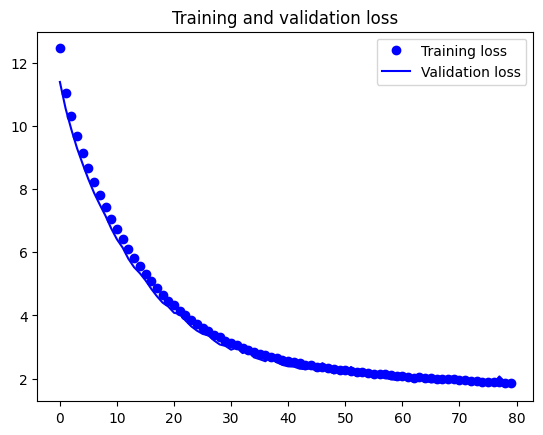

In [107]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.4352 - loss: 1.9892
test acc: 0.4560000002384186


### Model #22.1 (Pretrained ResNet50 Full Training)

In [3]:
img_size =150

conv_base = ResNet50(weights='imagenet',
                  include_top= False,
                  input_shape=(img_size, img_size, 3)) # Image Size 150 X 150 with 3 colour channels (RGB)

I0000 00:00:1734030752.091924  740165 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [4]:
model = models.Sequential()
model.add(conv_base) # Add more layers to ResNet50 base
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Flatten()) # Flatten features into a 1 dimensional vector for dense layers
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Dense layer with 512 neurons and ReLU activation with L2 regularization
model.add(layers.Dropout(0.5)) # Dropout layer with rate of 0.5
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))  # Output layer with 10 neurons (for 10 classes) and softmax activation with L2 regularization

In [5]:
# Unfreeze layers in the ResNet50 base starting from 'conv4_block1_1_conv'
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv4_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
# View all the layers of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,807,754 (190.00 MB)

 Trainable params: 48,304,650 (184.27 MB)

 Non-trainable params: 1,503,104 (5.73 MB)

In [7]:
# Train the Model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5), 
              metrics=['acc'])

# Data augmentation to train data to help model detect patterns better
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255) # Rescale test pixel values 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32, 
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
# Fit the model on training data for 100 epochs
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - acc: 0.1183 - loss: 14.3946 - val_acc: 0.1710 - val_loss: 12.1215
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - acc: 0.1661 - loss: 12.2150 - val_acc: 0.2225 - val_loss: 11.7144
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - acc: 0.1669 - loss: 11.7650 - val_acc: 0.2630 - val_loss: 11.3618
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - acc: 0.2033 - loss: 11.3777 - val_acc: 0.2625 - val_loss: 11.0204
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - acc: 0.1937 - loss: 11.0524 - val_acc: 0.2875 - val_loss: 10.6597
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - acc: 0.2313 - loss: 10.6563 - val_acc: 0.2985 - val_loss: 10.2592
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - acc: 0.2383 - loss: 10.2947 - val_acc: 0.3230 - val_loss: 9.9032
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - acc: 0.2617 - loss: 9.9258 - val_acc: 0.3430 - val_loss: 9.5312
Epoch 9/100

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('food_model_22.h5')

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.6838 - loss: 1.3369
test acc: 0.6819999814033508


### Model #22.2 (Pretrained ResNet50 Optimized)

In [8]:
# Fit the model on training data for 80 epochs
history = model.fit(
      train_generator,
      epochs=80,
      validation_data=validation_generator)

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80


I0000 00:00:1734030778.717968  740319 service.cc:148] XLA service 0x7ff278003bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734030778.718184  740319 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-12-13 03:12:59.045894: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734030780.519383  740319 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1734030789.110505  740319 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - acc: 0.1174 - loss: 14.0627

/home/yoyo/projects/tf217/tf217/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 213ms/step - acc: 0.1174 - loss: 14.0595 - val_acc: 0.1490 - val_loss: 12.1324
Epoch 2/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - acc: 0.1506 - loss: 12.2001 - val_acc: 0.2385 - val_loss: 11.6745
Epoch 3/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - acc: 0.1814 - loss: 11.6953 - val_acc: 0.2350 - val_loss: 11.2964
Epoch 4/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - acc: 0.1996 - loss: 11.3169 - val_acc: 0.2705 - val_loss: 10.9459
Epoch 5/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.2134 - loss: 10.9182 - val_acc: 0.2950 - val_loss: 10.5398
Epoch 6/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - acc: 0.2291 - loss: 10.5513 - val_acc: 0.2900 - val_loss: 10.1408
Epoch 7/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - acc: 0.2420 - loss: 10.1580 - val_acc: 0.3140 - val_loss: 9.7580
Epoch 8/80
235/235 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - acc: 0.2408 - loss: 9.8141 - val_acc: 0.3290 - val_loss: 9.3767
Epoch 9/80
235/235 ━━━━━━━━━━━

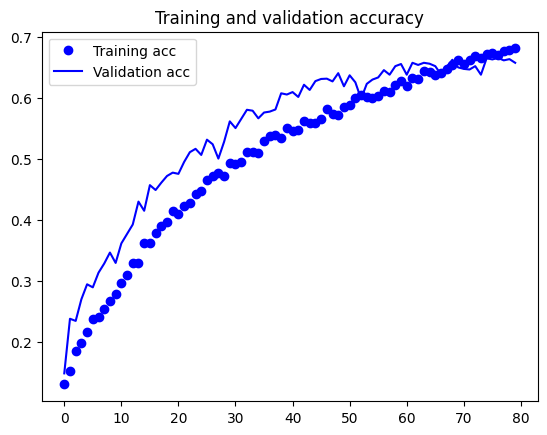

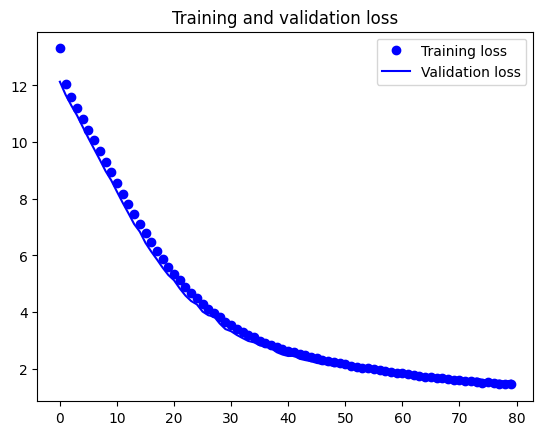

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 500 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - acc: 0.6470 - loss: 1.6100
test acc: 0.6660000085830688


## Step 4  – Use the best model to make prediction

In [11]:
# Load the model
model = keras.models.load_model('food_model_12.h5')

In [12]:
# Load the food list (in alphabetical order)
with open('28.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['apple_pie', 'cannoli', 'ceviche', 'cheesecake', 'churros', 'greek_salad', 'macaroni_and_cheese', 'miso_soup', 'seaweed_salad', 'strawberry_shortcake']


In [15]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

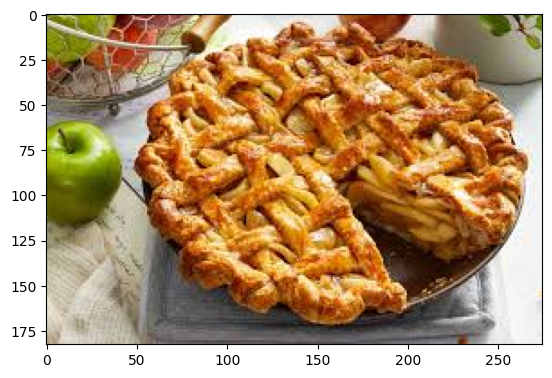

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The prediction is:  apple_pie 

    apple_pie       cannoli   ceviche    cheesecake       churros  \
0   0.999619  3.983926e-11  0.000001  4.060171e-11  9.466100e-07   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  3.238849e-10             0.000379  1.101993e-13   7.965729e-11   

   strawberry_shortcake  
0          5.059980e-13  


In [17]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'apple_pie.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

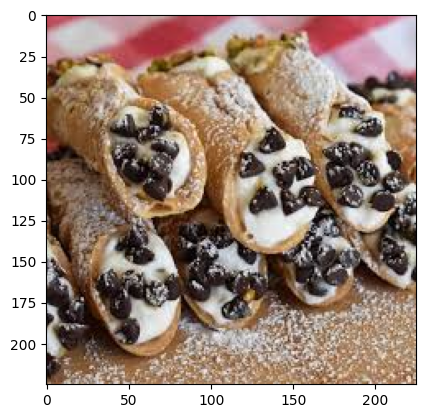

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The prediction is:  cannoli 

       apple_pie  cannoli       ceviche    cheesecake       churros  \
0  5.568921e-11      1.0  8.885579e-14  3.459872e-12  1.963879e-10   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  2.537087e-08         6.992086e-14  4.236646e-14   4.939296e-12   

   strawberry_shortcake  
0          1.288510e-11  


In [19]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'cannoli.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

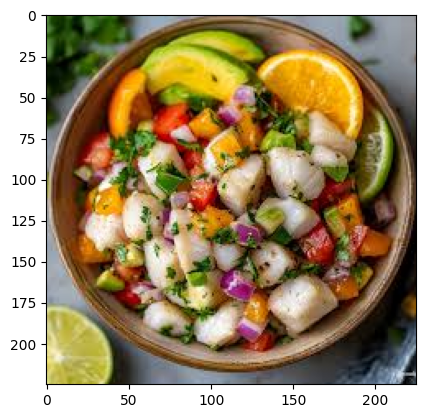

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
The prediction is:  ceviche 

       apple_pie       cannoli   ceviche    cheesecake       churros  \
0  3.603040e-18  5.688550e-16  0.999995  1.357077e-19  2.027841e-18   

   greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0     0.000005         2.188619e-15  4.840044e-20   5.678051e-18   

   strawberry_shortcake  
0          9.151749e-18  


In [20]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'ceviche.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

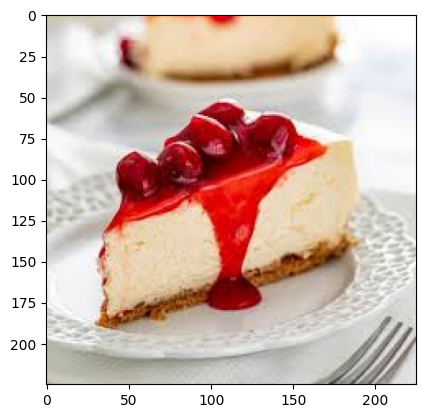

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
The prediction is:  cheesecake 

       apple_pie       cannoli       ceviche  cheesecake       churros  \
0  4.288849e-11  3.602429e-08  2.327838e-15         1.0  7.640878e-14   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  7.259280e-15         7.380467e-14  1.718314e-15   1.116773e-14   

   strawberry_shortcake  
0          9.212626e-08  


In [22]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'cheesecake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

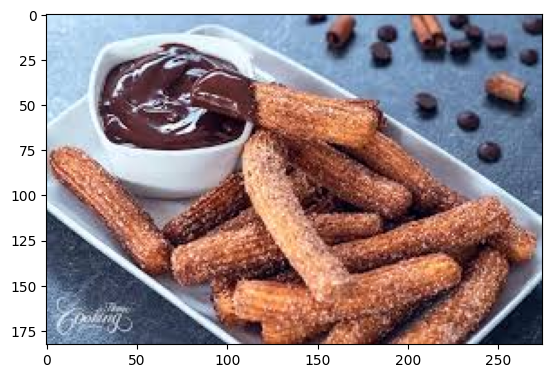

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The prediction is:  churros 

       apple_pie       cannoli       ceviche    cheesecake  churros  \
0  3.058729e-09  4.243664e-11  2.249755e-08  2.030677e-13      1.0   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  3.406980e-15         3.844697e-15  2.499007e-15   1.209442e-14   

   strawberry_shortcake  
0          1.347652e-13  


In [23]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'churros.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

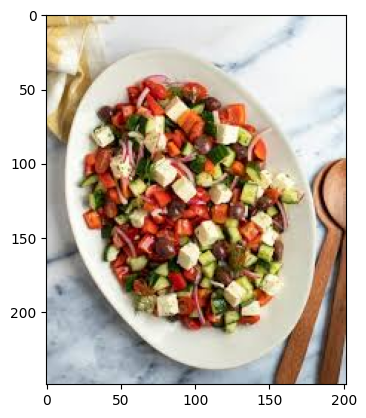

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
The prediction is:  greek_salad 

       apple_pie       cannoli   ceviche    cheesecake       churros  \
0  5.938163e-14  8.523469e-10  0.033633  2.304830e-12  2.296212e-12   

   greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0     0.966367         2.198836e-11  1.719647e-14   5.014719e-12   

   strawberry_shortcake  
0          3.799259e-13  


In [25]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'greek_salad.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

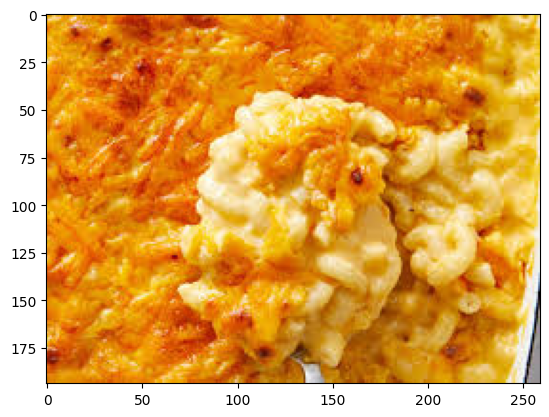

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The prediction is:  macaroni_and_cheese 

    apple_pie   cannoli   ceviche  cheesecake   churros  greek_salad  \
0   0.000466  0.000004  0.000831    0.000002  0.000001     0.000001   

   macaroni_and_cheese     miso_soup  seaweed_salad  strawberry_shortcake  
0             0.998665  1.160690e-07       0.000002              0.000028  


In [26]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'macaroni_and_cheese.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

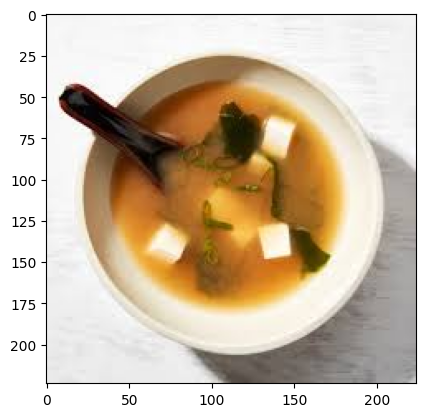

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The prediction is:  miso_soup 

       apple_pie       cannoli       ceviche    cheesecake       churros  \
0  4.662224e-13  3.017089e-18  3.555527e-11  1.478341e-12  5.515282e-16   

    greek_salad  macaroni_and_cheese  miso_soup  seaweed_salad  \
0  1.084360e-15         2.260856e-13        1.0   7.989422e-13   

   strawberry_shortcake  
0          2.709491e-16  


In [28]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'miso_soup.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

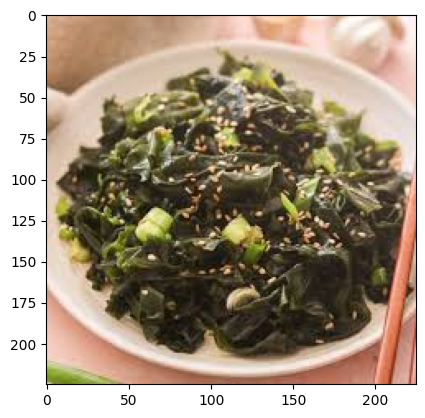

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
The prediction is:  seaweed_salad 

       apple_pie       cannoli       ceviche    cheesecake       churros  \
0  9.995737e-22  1.588501e-16  7.658234e-16  2.039611e-18  1.862301e-19   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  3.168936e-09         6.690753e-15  2.480597e-14            1.0   

   strawberry_shortcake  
0          4.987860e-21  


In [30]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'seaweed_salad.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

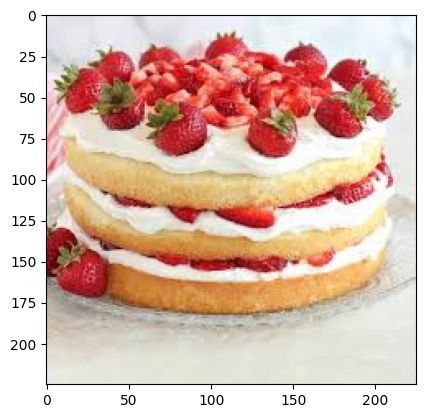

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The prediction is:  strawberry_shortcake 

       apple_pie       cannoli       ceviche    cheesecake       churros  \
0  8.947550e-11  1.047221e-12  4.728266e-11  3.239188e-09  9.257962e-13   

    greek_salad  macaroni_and_cheese     miso_soup  seaweed_salad  \
0  2.522094e-14         2.197081e-09  1.384685e-18   1.741633e-14   

   strawberry_shortcake  
0                   1.0  


In [31]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'strawberry_shortcake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)